# Анализ рынка кафетериев Москвы на июль 2022 года

## Описание
В этой работе будет проведен анализ рынка общепита с целью подбора грамотной бизнес-модели создания кафетерия в локации, предложенной заказчиком, а также выявления наиболее выгодных локаций в рамках Москвы.

## План работы:
1. Подготовка данных 
2. Анализ данных
3. Результаты
4. Рекомендации

## 1. Подготовка данных

### 1) Подключим нужные для работы библиотеки:

In [56]:
import numpy as np              # для матриц и математики
import pandas as pd             # для работы с табличками
from scipy import stats         # для работы со статистикой
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns           # для продвинутой визуализации

# для отображения карт
import folium                   
from folium.plugins import MarkerCluster

# для скачивания информации с html-страниц
import requests 
from bs4 import BeautifulSoup

# для подсчета расстояния с помощью широты и долготы
from geopy.distance import great_circle as GC  

# для отображения табло исполнения
from tqdm import tqdm

# стиль графиков
plt.style.use('ggplot')         
%matplotlib inline

### 2) Подгрузим набор данных, содержащий информацию про заведения общественного питания в Москве за июль 2022 года:

In [57]:
rest_df = pd.read_excel('rest_df_2022.xlsx')
rest_df.head(5)

/Users/daniilvostrikov/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


ID                                               Name  global_id  \
0        Код                                       Наименование  global_id   
1   00151635                                            СМЕТАНА  637376221   
2  000077874                                             Родник  637376331   
3  000024309                                    Кафе «Академия»  637376349   
4  000027429  ГБОУ «Школа № 1430 имени Героя Социалистическо...  637376480   

        IsNetObject               OperatingCompany   TypeObject  \
0  Является сетевым  Название управляющей компании  Вид объекта   
1               нет                            NaN         кафе   
2               нет                            NaN         кафе   
3               нет                            NaN     ресторан   
4               нет                            NaN     столовая   

                                   AdmArea           District  \
0         Административный округ по адресу              Район   
1  Северо-Восточный административный округ  Ярославский район   
2       Центральный административный округ    Таганский район   
3       Центральный административный округ    Таганский район   
4  Северо-Восточный административный округ    район Лианозово   

                                             Address  \
0                                              Адрес   
1         город Москва, улица Егора Абакумова, дом 9   
2  город Москва, улица Талалихина, дом 2/1, корпус 1   
3  Российская Федерация, город Москва, внутригоро...   
4              город Москва, Угличская улица, дом 17   

                       PublicPhone  ...  AdmArea_en  District_en  Address_en  \
0               Контактный телефон  ...  AdmArea_en  District_en  Address_en   
1  PublicPhone:(499) 183-14-10\n\n  ...         NaN          NaN         NaN   
2  PublicPhone:(495) 676-55-35\n\n  ...         NaN          NaN         NaN   
3  PublicPhone:(495) 662-30-10\n\n  ...         NaN          NaN         NaN   
4  PublicPhone:(499) 908-06-15\n\n  ...         NaN          NaN         NaN   

   PublicPhone_en  SeatsCount_en  SocialPrivileges_en  Longitude_WGS84_en  \
0  PublicPhone_en  SeatsCount_en  SocialPrivileges_en  Longitude_WGS84_en   
1             NaN            NaN                  NaN                 NaN   
2             NaN            NaN                  NaN                 NaN   
3             NaN            NaN                  NaN                 NaN   
4             NaN            NaN                  NaN                 NaN   

   Latitude_WGS84_en  geodata_center  geoarea  
0  Latitude_WGS84_en  geodata_center  geoarea  
1                NaN             NaN      NaN  
2                NaN             NaN      NaN  
3                NaN             NaN      NaN  
4                NaN             NaN      NaN  

[5 rows x 29 columns]

In [58]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18766 entries, 0 to 18765
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   18766 non-null  object
 1   Name                 18766 non-null  object
 2   global_id            18766 non-null  object
 3   IsNetObject          18766 non-null  object
 4   OperatingCompany     3592 non-null   object
 5   TypeObject           18766 non-null  object
 6   AdmArea              18766 non-null  object
 7   District             18766 non-null  object
 8   Address              18766 non-null  object
 9   PublicPhone          18766 non-null  object
 10  SeatsCount           18766 non-null  object
 11  SocialPrivileges     18766 non-null  object
 12  Longitude_WGS84      18766 non-null  object
 13  Latitude_WGS84       18766 non-null  object
 14  ID_en                1 non-null      object
 15  Name_en              1 non-null      object
 16  IsNe

Видно, что набор данных пока не готов для работы. Поэтому вначале приведем его в хороший вид, удалив последние 10 столбцов, в которых все значения нулевые(данные из этих столбцов доступны только при использовании API, и в этом проекте не нужны), столбцы *global_id*, *PublicPhone* и *SocialPrivileges*, а также 1-ую строчку в наборе данных, так как она хранит в себе просто перевод названий столбцов:

In [59]:
rest_df.drop(index = [0], columns = rest_df.iloc[:, 14:], inplace = True)
rest_df.drop(columns = ['global_id', 'PublicPhone', 'SocialPrivileges'], inplace = True)
rest_df.head(5)

ID                                               Name IsNetObject  \
1   00151635                                            СМЕТАНА         нет   
2  000077874                                             Родник         нет   
3  000024309                                    Кафе «Академия»         нет   
4  000027429  ГБОУ «Школа № 1430 имени Героя Социалистическо...         нет   
5   00148815                                           Брусника          да   

  OperatingCompany TypeObject                                  AdmArea  \
1              NaN       кафе  Северо-Восточный административный округ   
2              NaN       кафе       Центральный административный округ   
3              NaN   ресторан       Центральный административный округ   
4              NaN   столовая  Северо-Восточный административный округ   
5         Брусника       кафе       Центральный административный округ   

            District                                            Address  \
1  Ярославский район         город Москва, улица Егора Абакумова, дом 9   
2    Таганский район  город Москва, улица Талалихина, дом 2/1, корпус 1   
3    Таганский район  Российская Федерация, город Москва, внутригоро...   
4    район Лианозово              город Москва, Угличская улица, дом 17   
5        район Арбат      город Москва, переулок Сивцев Вражек, дом 6/2   

  SeatsCount      Longitude_WGS84       Latitude_WGS84  
1         48  37.7145650004360390  55.8790015313033730  
2         35  37.6733061300344000  55.7382386551547000  
3         95  37.6696475969381000  55.7355114718314000  
4        240  37.5669400000000020  55.9040188006692200  
5         10  37.5981275484399900  55.7473904905259940

In [60]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18765 entries, 1 to 18765
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18765 non-null  object
 1   Name              18765 non-null  object
 2   IsNetObject       18765 non-null  object
 3   OperatingCompany  3591 non-null   object
 4   TypeObject        18765 non-null  object
 5   AdmArea           18765 non-null  object
 6   District          18765 non-null  object
 7   Address           18765 non-null  object
 8   SeatsCount        18765 non-null  object
 9   Longitude_WGS84   18765 non-null  object
 10  Latitude_WGS84    18765 non-null  object
dtypes: object(11)
memory usage: 1.7+ MB


Чтобы впоследствии было удобнее работать, переведем данные в столбце *IsNetObject* к логическому типу:

In [61]:
def to_logical_values(x):
    if x == 'да':
        return True
    elif x == 'нет':
        return False

rest_df['IsNetObject'] = rest_df['IsNetObject'].apply(to_logical_values)

rest_df.head(5)

ID                                               Name  IsNetObject  \
1   00151635                                            СМЕТАНА        False   
2  000077874                                             Родник        False   
3  000024309                                    Кафе «Академия»        False   
4  000027429  ГБОУ «Школа № 1430 имени Героя Социалистическо...        False   
5   00148815                                           Брусника         True   

  OperatingCompany TypeObject                                  AdmArea  \
1              NaN       кафе  Северо-Восточный административный округ   
2              NaN       кафе       Центральный административный округ   
3              NaN   ресторан       Центральный административный округ   
4              NaN   столовая  Северо-Восточный административный округ   
5         Брусника       кафе       Центральный административный округ   

            District                                            Address  \
1  Ярославский район         город Москва, улица Егора Абакумова, дом 9   
2    Таганский район  город Москва, улица Талалихина, дом 2/1, корпус 1   
3    Таганский район  Российская Федерация, город Москва, внутригоро...   
4    район Лианозово              город Москва, Угличская улица, дом 17   
5        район Арбат      город Москва, переулок Сивцев Вражек, дом 6/2   

  SeatsCount      Longitude_WGS84       Latitude_WGS84  
1         48  37.7145650004360390  55.8790015313033730  
2         35  37.6733061300344000  55.7382386551547000  
3         95  37.6696475969381000  55.7355114718314000  
4        240  37.5669400000000020  55.9040188006692200  
5         10  37.5981275484399900  55.7473904905259940

In [62]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18765 entries, 1 to 18765
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18765 non-null  object
 1   Name              18765 non-null  object
 2   IsNetObject       18765 non-null  bool  
 3   OperatingCompany  3591 non-null   object
 4   TypeObject        18765 non-null  object
 5   AdmArea           18765 non-null  object
 6   District          18765 non-null  object
 7   Address           18765 non-null  object
 8   SeatsCount        18765 non-null  object
 9   Longitude_WGS84   18765 non-null  object
 10  Latitude_WGS84    18765 non-null  object
dtypes: bool(1), object(10)
memory usage: 1.6+ MB


Теперь приведем в порядок типы данных, так как по умолчанию везде стоит тип *object*:

In [63]:
rest_df[['ID', 'SeatsCount']] = rest_df[['ID', 'SeatsCount']].astype(int)
rest_df[['Longitude_WGS84', 'Latitude_WGS84']] = rest_df[['Longitude_WGS84', 'Latitude_WGS84']].astype(float)
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18765 entries, 1 to 18765
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18765 non-null  int64  
 1   Name              18765 non-null  object 
 2   IsNetObject       18765 non-null  bool   
 3   OperatingCompany  3591 non-null   object 
 4   TypeObject        18765 non-null  object 
 5   AdmArea           18765 non-null  object 
 6   District          18765 non-null  object 
 7   Address           18765 non-null  object 
 8   SeatsCount        18765 non-null  int64  
 9   Longitude_WGS84   18765 non-null  float64
 10  Latitude_WGS84    18765 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 1.6+ MB


Также удалим всю информацию о заведениях, находящихся в городский округах и поселениях, так как она неполная и нам не нужна, и уберем слово *район* из названий для удобного соединения таблиц в дальнейшем:

In [64]:
rest_df = rest_df[rest_df['District'].str.contains('район')]
rest_df['District'] = rest_df['District'].str.replace('район ', '')
rest_df['District'] = rest_df['District'].str.replace(' район', '')

Наконец, проверим датасет на наличие дубликатов:

In [65]:
print('Дубликатов строк в датасете: ', rest_df.duplicated().sum())
print('Дубликатов id объектов: ', len(rest_df)-len(rest_df['ID'].value_counts()))

Дубликатов строк в датасете:  0
Дубликатов id объектов:  0


### 3) Подгрузим датасет, содержащий информацию о заведениях общественного питания в Москве за июль 2021 года, и преобразуем его также, как *rest_df* (за 2022 год): 

Повторим все те же действия, что и для *rest_df*, только без лишних слов и пояснений:

In [66]:
rest_df_2021 = pd.read_excel('rest_df_2021.xlsx')

rest_df_2021.drop(columns = ['global_id', 'PublicPhone', 'SocialPrivileges', 'geodata_center', 'geoarea'], inplace = True)

rest_df_2021['IsNetObject'] = rest_df_2021['IsNetObject'].apply(to_logical_values)

rest_df_2021[['ID', 'SeatsCount']] = rest_df_2021[['ID', 'SeatsCount']].astype(int)
rest_df_2021[['Longitude_WGS84', 'Latitude_WGS84']] = rest_df_2021[['Longitude_WGS84', 'Latitude_WGS84']].astype(float)

rest_df_2021 = rest_df_2021[rest_df_2021['District'].str.contains('район')]
rest_df_2021['District'] = rest_df_2021['District'].str.replace('район ', '')
rest_df_2021['District'] = rest_df_2021['District'].str.replace(' район', '')

print('Дубликатов строк в датасете: ', rest_df_2021.duplicated().sum())
print('Дубликатов id объектов: ', len(rest_df_2021)-len(rest_df_2021['ID'].value_counts()))

/Users/daniilvostrikov/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Дубликатов строк в датасете:  0
Дубликатов id объектов:  0


### 4) Нам также понадобится дополнительная информация о районах Москвы, поэтому подгрузим нужные библиотеки и выкачаем соответствующую информацию с сайта *Wikipedia*:

In [12]:
URL = 'https://ru.wikipedia.org/wiki/Районы_и_поселения_Москвы'
response = requests.get(URL)
soup = BeautifulSoup(response.text,'html.parser')

table = soup.find('table',{'class':'standard sortable'}).tbody
rows = table.find_all('tr')
columns = [v.text.replace('\n','') for v in rows[0].find_all('th')]

df = pd.DataFrame(columns=columns)

for i in range(1,len(rows)):
    tds = rows[i].find_all('td')

    if len(tds)==4:
        values = [tds[0].text, tds[1].text, tds[2].text, tds[3].text.replace('\n',''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n',''.replace('\xa0','')) for td in tds]

    df = df.append(pd.Series(values, index=columns), ignore_index=True)

    df.to_csv('district_df.csv',index=False)
              

Теперь подгрузим скачанный набор данных про районы Москвы, и приведем его в порядок: удалим ненужные столбцы, сделаем им читаемые названия и укажем правильные типы данных:

In [67]:
district_df = pd.read_csv('district_df.csv')

# удалим ненужные столбцы
district_df.drop(columns = ['№', 'Флаг', 'Герб', 'Название района[2]/поселения[3][4]',
                        'Пло-щадьжилого фонда(01.01.2010)[9],тыс. м²'], inplace = True)
# удалим строки, содержащие информацию о городских округах и поселениях(ее мало, и мы их рассматривать не будем)
district_df = district_df[:125]

# приведем datframe в удобный для работы вид 
district_df.columns = ['Dist', 'AdmArea', 'Space', 'Population', 'Density', 'Flat']
district_df['Space'] = district_df['Space'].str.replace(',', '.')
district_df['Population'] = district_df['Population'].str.replace('↘', '')
district_df['Population'] = district_df['Population'].str.replace('\xa0', '')
district_df['Population'] = district_df['Population'].str.replace('↗', '')
district_df['Flat'] = district_df['Flat'].str.replace(',', '.')
district_df[['Space', 'Density']] = district_df[['Space', 'Density']].astype(float)
district_df['Population'] = district_df['Population'].astype(int)
district_df['Flat'] = district_df['Flat'].astype(float)

district_df.head(5)

Dist AdmArea  Space  Population   Density  Flat
0  Академический    ЮЗАО   5.83      110161  18895.54  22.7
1   Алексеевский    СВАО   5.29       79193  14970.32  20.5
2   Алтуфьевский    СВАО   3.25       57361  17649.54  15.5
3          Арбат     ЦАО   2.11       35796  16964.93  26.0
4       Аэропорт     САО   4.58       79283  17310.70  25.9

In [68]:
print('Дубликатов строк в датасете: ', district_df.duplicated().sum())
print('Дубликатов Dist в датасете: ', len(district_df)-len(district_df['Dist'].value_counts()))

Дубликатов строк в датасете:  0
Дубликатов Dist в датасете:  0


### 5) Еще нам понадобится дополнительная информация о станциях метрополитена Москвы, поэтому выкачаем соответствующую информацию с сайта *Wikipedia*:

In [15]:
URL = 'https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена'
response = requests.get(URL)
soup = BeautifulSoup(response.text,'html.parser')

table = soup.find('table',{'class':'standard sortable'}).tbody
rows = table.find_all('tr')
columns = [v.text.replace('\n','') for v in rows[0].find_all('th')]

df = pd.DataFrame(columns=columns)

for i in range(1,len(rows)):
    tds = rows[i].find_all('td')

    if len(tds)==4:
        values = [tds[0].text, tds[1].text, tds[2].text, tds[3].text.replace('\n',''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n',''.replace('\xa0','')) for td in tds]

    df = df.append(pd.Series(values, index=columns), ignore_index=True)

    df.to_csv('metro_df.csv',index=False)

Теперь подгрузим скачанный набор данных про стнции метрополитена Москвы, и приведем его в порядок: удалим ненужные столбцы, сделаем им читаемые названия, укажем правильные типы данных, а также разделим столбец координат на широту и долготу и приведем в десятичный формат:

In [69]:
metro_df = pd.read_csv('metro_df.csv')

metro_df = metro_df.drop(columns = ['Unnamed: 0', 'Датаоткрытия', 'Пере-садки', 'Глубина,м[1]', 'Тип конструкции', 'Вид станции'])
metro_df.columns = ['name', 'coordinates']

metro_df['coordinates'] = metro_df['coordinates'].str.replace('HЯ', '')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('°', '-')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('′', '-')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('″', '')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('с', '')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('в', '')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('ш', 'N\n')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('д', 'E')
metro_df['coordinates'] = metro_df['coordinates'].str.replace('.', '', regex = True)
metro_df['coordinates'] = metro_df['coordinates'].str.strip()
metro_df[['lat', 'lon']] = metro_df['coordinates'].str.split('\n', expand = True)
metro_df.drop(columns = 'coordinates', inplace = True)

# функция для пересчета широты и долготы в десятичный формат
def convert(tude):
    multiplier = 1 if tude[-1] in ['N', 'E'] else -1
    return multiplier * sum(float(x) / 60 ** n for n, x in enumerate(tude[:-2].split('-')))


metro_df['lat'] = metro_df['lat'].apply(convert)
metro_df['lon'] = metro_df['lon'].apply(convert)

metro_df.head(5)

name        lat        lon
0  Бульвар РокоссовскогоУлица Подбельского (с 01....  55.814722  37.734167
1                                       Черкизовская  55.803889  37.744722
2                             Преображенская площадь  55.796389  37.715000
3                                         Сокольники  55.788889  37.680278
4                                     Красносельская  55.780000  37.667222

In [70]:
print('Дубликатов строк в датасете: ', metro_df.duplicated().sum())
print('Дубликатов name в датасете: ', len(metro_df)-len(metro_df['name'].value_counts()))

Дубликатов строк в датасете:  4
Дубликатов name в датасете:  20


В датасете нашлись и дибликаты строк, и дубликаты *name*. После тщательной ручной проверки и ряда запросов в Интернете было установлено, что в московском метрополитене действительно есть станции на разных ветках с одинаковым названием, причем 2 из них находятся в одном месте. Поэтому ошибок в данных нет. Однако все же удалим дубликаты, так как сейчас нам не важно, на какой ветке находится станции:

In [71]:
metro_df = metro_df.drop_duplicates()

In [72]:
lat = metro_df['lat']
lon = metro_df['lon']
name = metro_df['name']

map = folium.Map(location=[55.7522, 37.6156], zoom_start = 10)

marker_cluster = MarkerCluster().add_to(map)

for lat, lon, name in zip(lat, lon, name):
    folium.CircleMarker(location=[lat, lon], radius = 5, popup = name, fill_color = 'orange', color = 'gray', fill_opacity = 0.9).add_to(marker_cluster)

map

Теперь можно приступать к анализу данных.

## 2. Анализ данных

### 0) Добавление в основную таблицу данных о расстоянии до метро:

In [73]:
name = metro_df['name'].to_list()
lon = metro_df['lon'].to_list()
lat = metro_df['lat'].to_list()


def nearest(x, y):
    dist = 10000000
    for a, b, c in zip(name, lon, lat):
        new_dist = GC((b, c), (x, y)).m 
        if new_dist < dist:
            dist = new_dist
            station = a
    return [station, dist]

rest_df['Nearest_station'] = rest_df.apply(lambda x: nearest(x['Longitude_WGS84'], x['Latitude_WGS84'])[0], axis = 1)
rest_df['Station_distance'] = rest_df.apply(lambda x: nearest(x['Longitude_WGS84'], x['Latitude_WGS84'])[1], axis = 1)

In [74]:
rest_df.head(5)

ID                                               Name  IsNetObject  \
1  151635                                            СМЕТАНА        False   
2   77874                                             Родник        False   
3   24309                                    Кафе «Академия»        False   
4   27429  ГБОУ «Школа № 1430 имени Героя Социалистическо...        False   
5  148815                                           Брусника         True   

  OperatingCompany TypeObject                                  AdmArea  \
1              NaN       кафе  Северо-Восточный административный округ   
2              NaN       кафе       Центральный административный округ   
3              NaN   ресторан       Центральный административный округ   
4              NaN   столовая  Северо-Восточный административный округ   
5         Брусника       кафе       Центральный административный округ   

      District                                            Address  SeatsCount  \
1  Ярославский         город Москва, улица Егора Абакумова, дом 9          48   
2    Таганский  город Москва, улица Талалихина, дом 2/1, корпус 1          35   
3    Таганский  Российская Федерация, город Москва, внутригоро...          95   
4    Лианозово              город Москва, Угличская улица, дом 17         240   
5        Арбат      город Москва, переулок Сивцев Вражек, дом 6/2          10   

   Longitude_WGS84  Latitude_WGS84       Nearest_station  Station_distance  
1        37.714565       55.879002          Бабушкинская       5636.249458  
2        37.673306       55.738239  Крестьянская застава        815.944241  
3        37.669648       55.735511  Крестьянская застава        345.628973  
4        37.566940       55.904019             Алтуфьево       2285.630134  
5        37.598128       55.747390             Арбатская        482.127488

### 1) Распределение заведений общепита в Москве:

In [75]:
print('В Москве на данный момент', (rest_df['TypeObject'] == 'кафетерий').sum(),'кафетериев.')

В Москве на данный момент 1358 кафетериев.


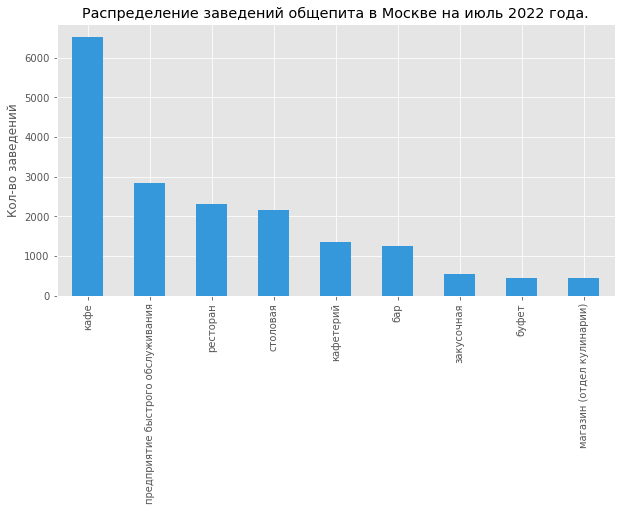

In [76]:
rest_plot = (
    rest_df.groupby('TypeObject')['ID']
    .agg('nunique')
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(10,5),
          title = 'Распределение заведений общепита в Москве на июль 2022 года.',
          xlabel = '',
          ylabel = 'Кол-во заведений',
          color = '#3498db')
)
rest_plot;

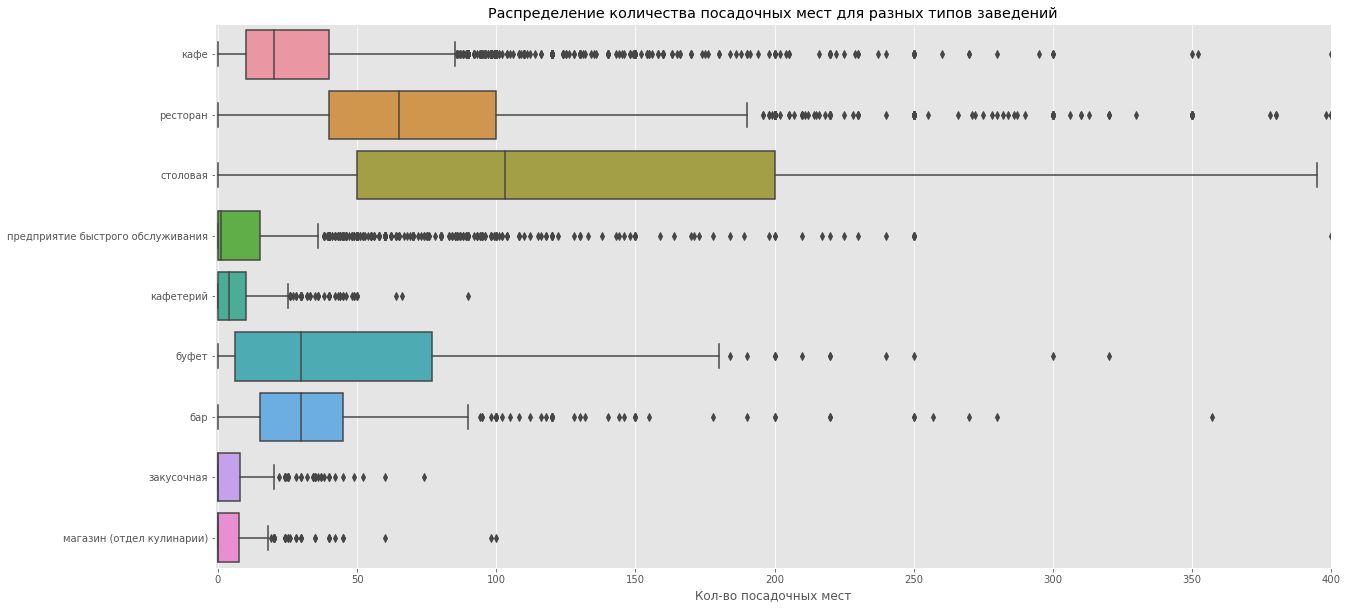

In [77]:
plt.figure(figsize=(20,10))
plt.xlim(-1,400)
sns.boxplot(data = rest_df, x = 'SeatsCount', y = 'TypeObject')
plt.title('Распределение количества посадочных мест для разных типов заведений')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

Из 1-го графика видно, что основные заведения в Москве - это кафе. Кафетерии же не обладают в Москве такой популярностью, как, например, в Европе. Из 2-го графика сравним кафе и кафетерии: распределение по посадочным местам для кафе сильно сдвинуто вправо относительно распределения для кафетериев. Однако нас интересуют именно кафетерии(их 1358 в Москве), поэтому сделаем соответсвующий срез и продолжим работу. 

In [78]:
cafeteria_df = rest_df[rest_df['TypeObject'] == 'кафетерий']
cafeteria_df.head(5)

ID               Name  IsNetObject   OperatingCompany TypeObject  \
17   125608          Кафетерий        False                NaN  кафетерий   
62    69159       БУЛОЧНАЯ № 5        False                NaN  кафетерий   
128   83940  Тирольские пироги         True  Тирольские пироги  кафетерий   
158  157901           АВ-Дейли        False                NaN  кафетерий   
161  157659           МАГНОЛИЯ         True           Магнолия  кафетерий   

                                     AdmArea      District  \
17   Северо-Восточный административный округ  Алтуфьевский   
62    Северо-Западный административный округ        Щукино   
128       Центральный административный округ     Таганский   
158       Центральный административный округ      Тверской   
161       Центральный административный округ      Тверской   

                                              Address  SeatsCount  \
17           город Москва, Алтуфьевское шоссе, дом 56           6   
62       город Москва, улица Маршала Бирюзова, дом 28          10   
128          город Москва, Воронцовская улица, дом 48          30   
158  город Москва, Тверская улица, дом 27, строение 2           8   
161    город Москва, 1-я Тверская-Ямская улица, дом 9          10   

     Longitude_WGS84  Latitude_WGS84   Nearest_station  Station_distance  
17         37.587833       55.880805         Алтуфьево       1523.195081  
62         37.487013       55.797371  Октябрьское Поле        805.154233  
128        37.663852       55.732592      Пролетарская        227.614186  
158        37.597550       55.768647        Маяковская        225.077597  
161        37.591844       55.772095        Маяковская        480.507187

Выясним, сколько в таблице cafeteria_df паразитных данных о кафетериях с 0 посадочных мест:

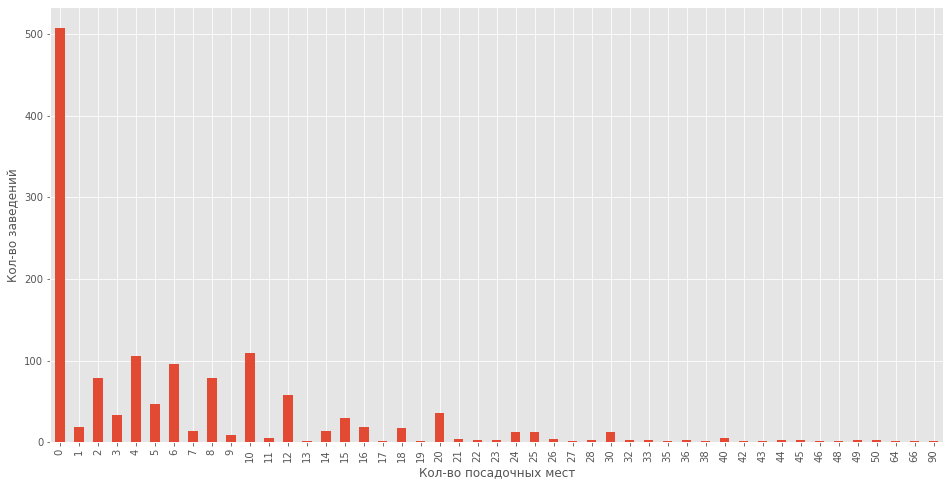

In [79]:
cafeteria_df.groupby('SeatsCount')['ID'].agg('nunique').plot(kind = 'bar', figsize = (16,8),
                                                            ylabel='Кол-во заведений',
                                                            xlabel='Кол-во посадочных мест')
None

Огромную долю данных в датасете занимают(более 500 из 1358) кафетерии с 0 посадочных мест, однако эти данные нам не нужны и будут портить статистику в дальнейшем. Удалим их:

In [80]:
cafeteria_df = cafeteria_df[cafeteria_df['SeatsCount'] != 0]
cafeteria_df.shape

(850, 13)

Осталось 850 заведений для анализа данных. Теперь посмотрим на получившееся адекватное распределение посадочных мест в кафетериях:

Доля кафетериев с <10 посадочными местами составляет около 56 % от общего числа кафетериев в Москве.


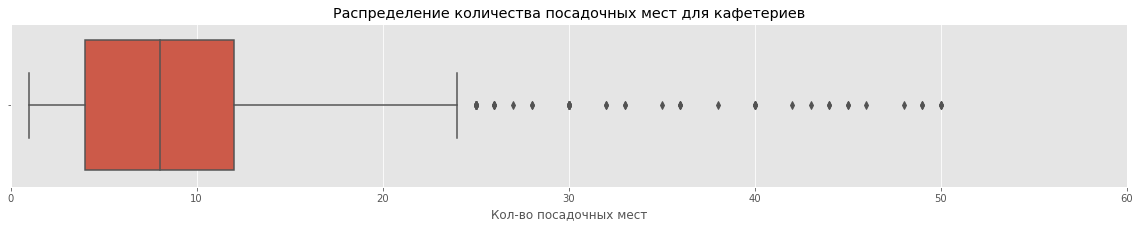

In [81]:
x = 100 * (cafeteria_df['SeatsCount'] < 10).sum() / len(cafeteria_df)
print('Доля кафетериев с <10 посадочными местами составляет около', round(x), '% от общего числа кафетериев в Москве.')

plt.figure(figsize=(20, 3))
plt.xlim(0,60)
sns.boxplot(data = cafeteria_df, x = 'SeatsCount')
plt.title('Распределение количества посадочных мест для кафетериев')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

Распределение сместилось вправо, однако все равно остается сильно левее распределения для кафе. Видно, что кафетерии забегалочного типа в Москве не сильно превалируют над обычными кафетериями, значит с данным датасетом можно полноценно работать(в противном случае пришлось бы добавлять в анализ заведения типа кафе и работать с ними).

### 2) Исследование сетевой направленности бизнеса кафетериев в Москве: 

In [82]:
s = (cafeteria_df['IsNetObject'] == True).sum()
print('Доля сетевых заведений составляет ', round((s / 1435) * 100, 1), '% от общего числа кафетериев Москвы, то есть ', s, 'точек.')


Доля сетевых заведений составляет  12.2 % от общего числа кафетериев Москвы, то есть  175 точек.


Видно, что сетевых заведений намного меньше, и в основном кафетерии открываются индивидуально.

/var/folders/tx/jc8_0sl92klfzzmp_l613pxc0000gn/T/ipykernel_76432/1819581828.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  net = cafeteria_df[rest_df['IsNetObject'] == True]


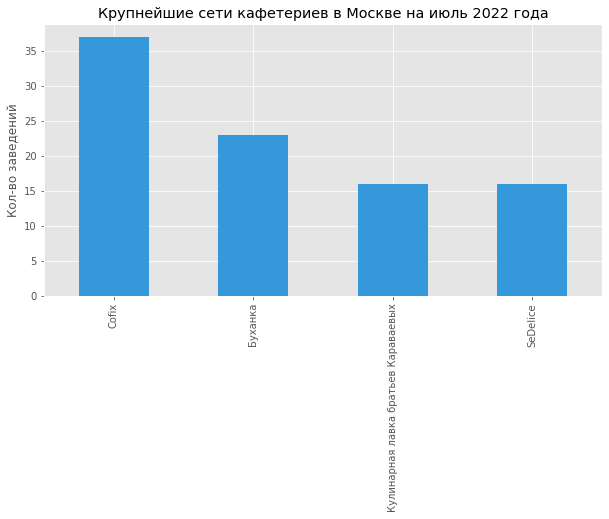

In [83]:
net = cafeteria_df[rest_df['IsNetObject'] == True]
net_plot = (
    cafeteria_df.groupby('OperatingCompany')['ID']
    .agg('nunique')
    .sort_values(ascending = False)[:4]
    .plot(kind = 'bar', figsize = (10,5), title = 'Крупнейшие сети кафетериев в Москве на июль 2022 года',
          xlabel = '',
          ylabel = 'Кол-во заведений',
          color = '#3498db')
)
net_plot;

None

- Cofix: израильская кофейня быстрого обслуживания, низкий ценовой сегмент, международная компания, франшиза доступна.
- Буханка: русская кофейня, формат не забегалочный, средний ценовой сегмент, франшиза доступна.
- Кулинарная лавка братьев Караваевых: русская кофейня, формат не забегалочный, средний ценовой сегмент, франшиза не доступна.
- SeDelice: французская кофейня, в среднем около 10 посадочных мест в заведениях, средний ценовой сегмент, франшиза доступна.

Сверху на диаграмме можно видеть 4 наиболее популярные сетевые заведения в Москве(у остальных меньше 10 заведений).

### 3) Распределение кафетериев по округам Москвы:

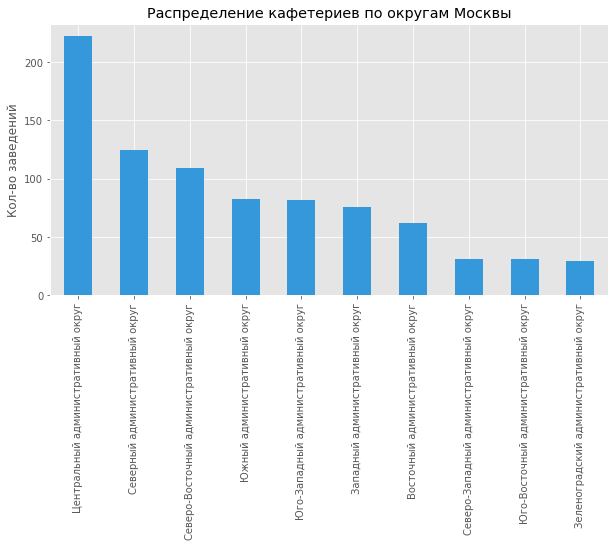

In [84]:
admarea_info = (
    cafeteria_df.groupby('AdmArea')
    .agg({
        'ID': 'count'
    })
)
admarea_info.columns = ['Quantity']
admarea_plot = (admarea_info['Quantity']
                .sort_values(ascending = False)
                .plot(kind = 'bar', figsize = (10,5),
                      title = 'Распределение кафетериев по округам Москвы',
                      xlabel = '',
                      ylabel = 'Кол-во заведений',
                      color = '#3498db')
               )

None

Нанесем на карту кафетерии в Москве, чтобы получить наглядное распределение кафетериев по местоположению:

In [85]:
lat = cafeteria_df['Latitude_WGS84']
lon = cafeteria_df['Longitude_WGS84']
name = cafeteria_df['Name']

map = folium.Map(location=[55.7522, 37.6156], zoom_start = 10)

marker_cluster = MarkerCluster().add_to(map)

for lat, lon, name in zip(lat, lon, name):
    folium.CircleMarker(location=[lat, lon], radius = 5, popup = name, fill_color = 'orange', color = 'gray', fill_opacity = 0.9).add_to(marker_cluster)

map

С помощью карты и диаграммы выше легко понять, что подовляющее большинство кафетериев в Москве находится в центре Москвы, в районах с огромной проходимостью и большим туристическим потоком.

### 4) Закрытые и открытые за последний год кафетерии Москвы: 

Сделаем срез из датасета за апрель 2021 года, содержащий информацию о кафетериях Москвы:

In [86]:
cafeteria_df_2021 = rest_df_2021[rest_df_2021['TypeObject'] == 'кафетерий']
cafeteria_df = cafeteria_df[cafeteria_df['SeatsCount'] != 0]

Исследуем, сколько открылось новых заведений, а сколько закрылось за этот период:

In [87]:
ids = cafeteria_df['ID'].to_list()
ids_2021 = cafeteria_df_2021['ID'].to_list()

# функция для поиска элементов, которые есть в a[], но нет в b[]
def findMissing(a, b):
    n = len(a)
    m = len(b)
    c = []
    for i in range(n):
        for j in range(m):
            if (a[i] == b[j]):
                break
        if (j == m - 1):
            c.append(a[i])
    return c
            
opened = findMissing(ids, ids_2021)
closed = findMissing(ids_2021, ids)
print('C апреля 2021 года было закрыто', len(closed), 'кафетериев в Москве.')
print('C апреля 2021 года было открыто', len(opened), 'кафетерив в Москве.')
print('Итого, в Москве с апреля 2021 года стало на', len(closed) - len(opened), 'кафетериев меньше.')

C апреля 2021 года было закрыто 559 кафетериев в Москве.
C апреля 2021 года было открыто 467 кафетерив в Москве.
Итого, в Москве с апреля 2021 года стало на 92 кафетериев меньше.


Создадим датасет с открывшимися и закрывшимися с апреля 2021 года кафетериями Москвы:

In [88]:
opened_cafeteria_df = cafeteria_df[cafeteria_df['ID'].isin(opened)]
closed_cafeteria_df = cafeteria_df_2021[cafeteria_df_2021['ID'].isin(closed)]

Нанесем на карту открывшиеся с апреля 2021 года кафетерии в Москве:

In [89]:
lat = opened_cafeteria_df['Latitude_WGS84']
lon = opened_cafeteria_df['Longitude_WGS84']
name = opened_cafeteria_df['Name']

map = folium.Map(location=[55.7522, 37.6156], zoom_start = 10)

marker_cluster = MarkerCluster().add_to(map)

for lat, lon, name in zip(lat, lon, name):
    folium.CircleMarker(location=[lat, lon], radius = 5, popup = name, fill_color = 'orange', color = 'gray', fill_opacity = 0.9).add_to(marker_cluster)

map

Нанесем на карту закрывшиеся с апреля 2021 года кафетерии Москвы:

In [90]:
lat = closed_cafeteria_df['Latitude_WGS84']
lon = closed_cafeteria_df['Longitude_WGS84']
name = closed_cafeteria_df['Name']

map = folium.Map(location=[55.7522, 37.6156], zoom_start = 10)

marker_cluster = MarkerCluster().add_to(map)

for lat, lon, name in zip(lat, lon, name):
    folium.CircleMarker(location=[lat, lon], radius = 5, popup = name, fill_color = 'orange', color = 'gray', fill_opacity = 0.9).add_to(marker_cluster)

map

С помощью проведенного простейшего анализа и построенных карт можно сделать выводы:
- Даже после окончания ковидных ограничений рынок не смог окончательно оправиться: закрылось больше кафетериев, чем открылось.
- На данный момент подавляющее большинство кафетериев находится в центре Москвы, но также большое кол-во есть и в Северном Администативном округе.
- Также открыто(закрыто) много кафетериев было именно в центре Москвы.

### 5) Создание общей таблицы с информацией о районах Москвы: 

Сделаем общую таблицу с информацией по районам. В ней будут столбцы:
1. *Dist* - название района
2. *Adm_Area* - округ
3. *Space* - площадь района ( км$^2$ )
4. *Population* - население района ( чел. ) 
5. *Density* - плотность населения ( чел./км$^2$ )
6. *Flat* - жил-площадь на человека ( м$^2$/чел. )
7. *Quan* - кол-во кафетериев в районе
8. *Seats_mean* - среднее число посадочных мест в кафетериях на июль 2022 года
9. *Avg_st_distance* - среднее расстояние от кафетериев в районе до ближайших станций метрополитена
10. *Quan_>=10* - кол-во заведений в районе с >=10 посадочными местами
11. *Quan_>=10_%* - кол-во заведений в районе с >=10 посадочными местами в процентах
12. *Op_quan* - кол-во открытых в районе с апреля 2022 года кафетериев
13. *Op_seats_mean* - среднее число посадочных мест в открытых с апреля 2021 года кафетериях
14. *Cl_quan* - кол-во закрытых в районе с апреля 2022 года кафетериев
15. *Cl_seats_mean* - среднее число посадочных мест в закрытых с апреля 2021 года кафетериях
16. *Quan/Population* - кол-во кафетериев, отнормированное на население района
17. *Quan/Space* -  плотность расположения кафетериев в районе

In [91]:
# функция для подсчета кафетериев, в которых >= 12 посадочных мест
def func_1(x):
    return (x >= 10).sum()

# функция для подсчета доли кафетериев(в %), в которых >= 12 посадочных мест
def func_2(x):
    return 100 * (x >= 10).sum() / (x >= 0).sum()



# количество кафетериев в районах на июль 2022 года
a = (
    cafeteria_df.groupby('District', as_index = False)
    .agg({
        'ID': 'count',
        'SeatsCount': ['mean', func_1, func_2],
        'Station_distance': 'mean'
    })
)

a.columns = ['Dist', 'Quan', 'Seats_mean', 'Quan_>=10', 'Quan_>=10_%', 'Avg_st_distance']

# открытые с 2021 года кафетерии
b = (
    opened_cafeteria_df.groupby('District', as_index = False)
    .agg({
        'ID': 'count',
        'SeatsCount': 'mean'
    })
)

b.columns = ['Dist', 'Op_quan', 'Op_seats_mean']


# закрытые с 2021 года кафетерии
c = (
    closed_cafeteria_df.groupby('District', as_index = False)
    .agg({
        'ID': 'count',
        'SeatsCount': 'mean'
    })
)

c.columns = ['Dist', 'Cl_quan', 'Cl_seats_mean']

district_df = pd.merge(district_df, a, how = 'left', left_on = 'Dist', right_on = 'Dist')
district_df = pd.merge(district_df, b, how = 'left', left_on = 'Dist', right_on = 'Dist')
district_df = pd.merge(district_df, c, how = 'left', left_on = 'Dist', right_on = 'Dist')

district_df = district_df.fillna(0)

district_df['Quan'] = district_df['Quan'].astype(int)
district_df['Op_quan'] = district_df['Op_quan'].astype(int)
district_df['Cl_quan'] = district_df['Cl_quan'].astype(int)
district_df['Quan_>=10'] = district_df['Quan_>=10'].astype(int)
district_df['Quan_>=10_%'] = district_df['Quan_>=10_%'].astype(int)

district_df['Quan/Population'] = district_df['Quan'] / district_df['Population']
district_df['Quan/Space'] = district_df['Quan'] / district_df['Space']

In [92]:
district_df.head(5)

Dist AdmArea  Space  Population   Density  Flat  Quan  Seats_mean  \
0  Академический    ЮЗАО   5.83      110161  18895.54  22.7    11    7.181818   
1   Алексеевский    СВАО   5.29       79193  14970.32  20.5    12    7.416667   
2   Алтуфьевский    СВАО   3.25       57361  17649.54  15.5     2    5.000000   
3          Арбат     ЦАО   2.11       35796  16964.93  26.0    12   16.750000   
4       Аэропорт     САО   4.58       79283  17310.70  25.9     4   12.750000   

   Quan_>=10  Quan_>=10_%  Avg_st_distance  Op_quan  Op_seats_mean  Cl_quan  \
0          3           27       500.964845        6       6.500000        2   
1          3           25       499.653413        6       5.333333       20   
2          0            0      1399.412758        1       4.000000        1   
3          7           58       355.188059        5      15.800000        3   
4          1           25       396.144577        4      12.750000        0   

   Cl_seats_mean  Quan/Population  Quan/Space  
0       3.000000         0.000100    1.886792  
1       4.700000         0.000152    2.268431  
2       1.000000         0.000035    0.615385  
3      14.666667         0.000335    5.687204  
4       0.000000         0.000050    0.873362

Посмотрим на корреляцию между переменными внутри датасета:

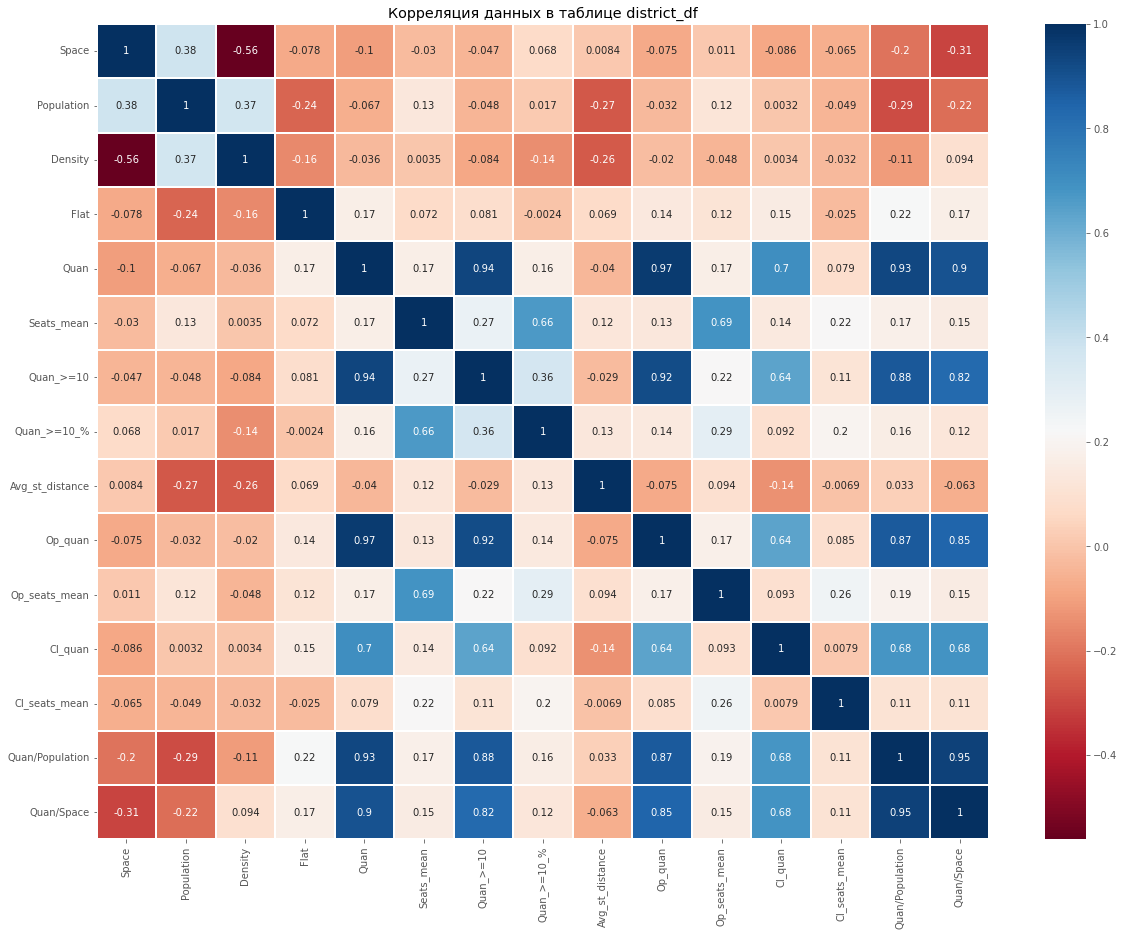

In [93]:
plt.figure(figsize=(20,15))
plt.title('Корреляция данных в таблице district_df')

sns.heatmap(district_df.corr(method='pearson'),
            annot = True, linewidths = 0.1, cmap="RdBu");

К сожалению, из тепловой карты видно, что почти никакие величины хорошо не коррелируют(корреляция по модулю меньше 0.5), кроме очевидных зависимостей(как, например, отрицательная зависимость площади района и плотности населения) и 2-х зависимостей:
- Op_quan очень сильно коррелирует(0.97) с Quan, то есть практически всегда кафетерии открываются в районах, где уже итак много кафетериев(да-да, прошлые надумки роляют).
- Cl_quan сильно коррелирует(0.7) c Quan, но это в целом легко объяснимо, ведь очевидно из статистики, что чем больше в районе кафетериев, тем больше их и закроется отностительно других менее загруженных районов(плюс ко всему возможно причина еще и в большой конкуренции).

### 6) Создание топов по разным категориям

#### 1) Топ-10 районов по количеству кафетериев:

In [94]:
test_1 = (district_df.sort_values('Quan', ascending = False))

В Куркино на июль 2022 года находится 4 кафетерия(по этому показателю Куркино занимает 64 место).


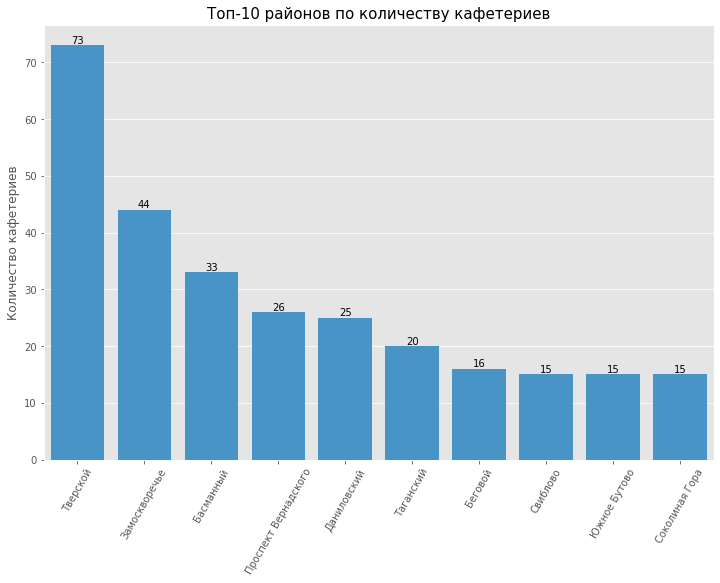

In [95]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Dist', y='Quan', data=test_1[:10], color='#3498db')
plt.setp(plt.xticks()[1],rotation=60,fontsize=10);
plt.ylabel('Количество кафетериев',fontsize=12)
plt.xlabel('')
plt.title('Топ-10 районов по количеству кафетериев',fontsize=15)
num_1 = test_1['Dist'].to_list().index('Куркино')
ax.bar_label(ax.containers[0])

print('В Куркино на июль 2022 года находится', 
      test_1['Quan'].to_list()[num_1], 
      'кафетерия(по этому показателю Куркино занимает', num_1 + 1, 'место).')

Мы видим, что в данном топе есть много районов центра Москвы или рядом с центром Москвы(7 районов из 10), где присутствует огромный туристический поток, а также поток людей, ездящих на общественном транспорте(в центре пересекается огромное число разных веток метро). Однако по данному топу нельзя судить, в каких районах выгоднее всего открывать кафетерии. Для объективной оценки количество кафетериев надо нормировать на другие величины.

#### 2) Топ-10 районов по соотношению (кол-во кафетериев / численность населения):

Логично будет отнормировать количество кафетериев в районе на численность населения района:

In [96]:
test_2 = (district_df.sort_values('Quan/Population', ascending = False))

Показатель (кол-во кафетериев / население) у Куркино равен 0.00012 (по этому показателю Куркино занимает 27 место).


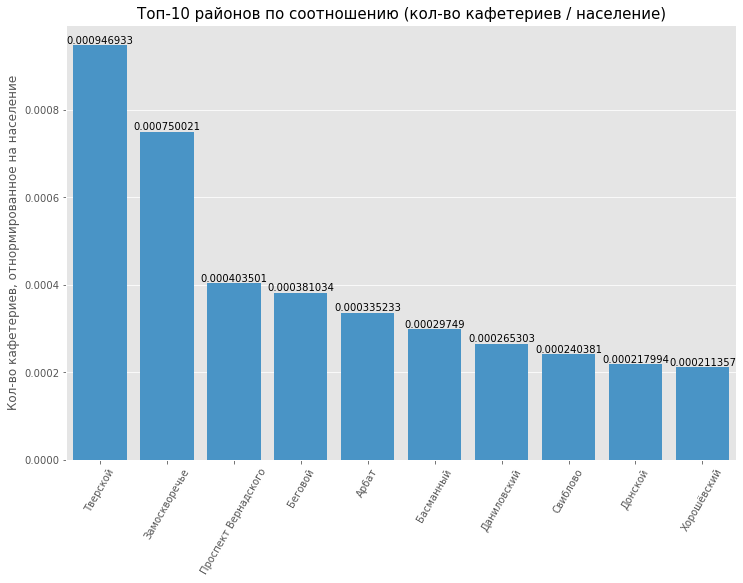

In [97]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Dist', y='Quan/Population', data=test_2[:10], color='#3498db')
plt.setp(plt.xticks()[1],rotation=60,fontsize=10);
plt.ylabel('Кол-во кафетериев, отнормированное на население',fontsize=12)
plt.xlabel('')
plt.title('Топ-10 районов по соотношению (кол-во кафетериев / население)',fontsize=15)
ax.bar_label(ax.containers[0])

num_2 = test_2['Dist'].to_list().index('Куркино')
print('Показатель (кол-во кафетериев / население) у Куркино равен', 
      round(test_2['Quan/Population'].to_list()[num_2], 5), 
      '(по этому показателю Куркино занимает', num_2 + 1, 'место).')

Видно, что от предыдущего топа этот отличается, а именно вместо районов Таганский, Южное Бутово и Соколиная Гора появились районы Арбат, Донской и Хорошевский. Однако по текущему топу тоже не следует судить о выгодности открытия кафетериев в определенных районах, потому что как отмечалось выше, очень важна именно проходимость в районе, а эта величина не сильно зависит именно от численности населения.

#### 3) Топ-10 районов по плотности расположения кафетериев:

Отнормируем теперь количество кафетериев в районе на площадь района:

In [98]:
test_3 = (district_df.sort_values('Quan/Space', ascending = False))

Показатель (кол-во кафетериев / площадь района) у Куркино равен 0.5063 (по этому показателю Куркино занимает 76 место).


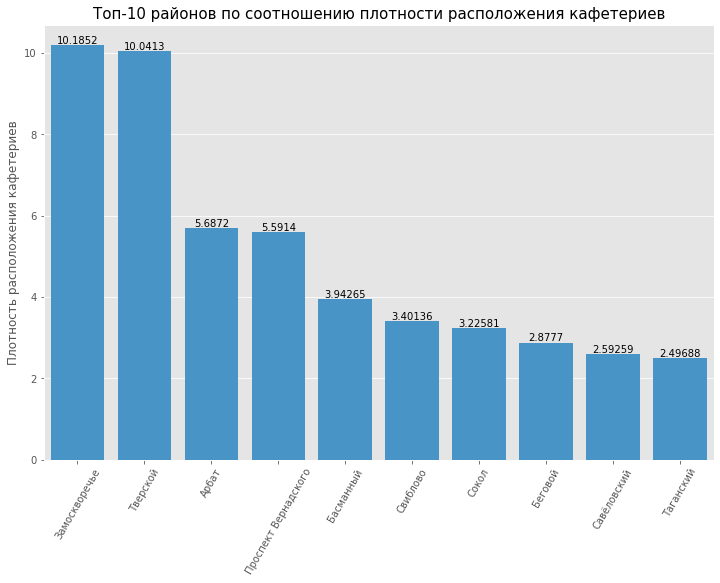

In [99]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Dist', y='Quan/Space', data=test_3[:10], color='#3498db')
plt.setp(plt.xticks()[1],rotation=60,fontsize=10);
plt.ylabel('Плотность расположения кафетериев',fontsize=12)
plt.xlabel('')
plt.title('Топ-10 районов по соотношению плотности расположения кафетериев',fontsize=15)
ax.bar_label(ax.containers[0])

num_3 = test_3['Dist'].to_list().index('Куркино')
print('Показатель (кол-во кафетериев / площадь района) у Куркино равен', 
      round(test_3['Quan/Space'].to_list()[num_3], 4), 
      '(по этому показателю Куркино занимает', num_3 + 1, 'место).')

Видно, что от предыдущего 1-го топа этот отличается, а именно вместо районов Южное Бутово и Соколиная Гора появились районы Сокол и Савеловский(то есть Южное Бутово и Соколиная Гора попали в 1-ый топ за счет большой площади). В нынешнем топе присутствует уже 9 районов, которые находятся в окрестности центра Москвы. Теперь можно с уверенностью утверждать, что выгоднее всего открывать кафетерии ближе к центру Москвы, в местах с большой проходимостью и туристическим потоком.

Посмотрим на распределение посадочных мест в топ-10 районах Москвы по плотности расположения кафетериев:

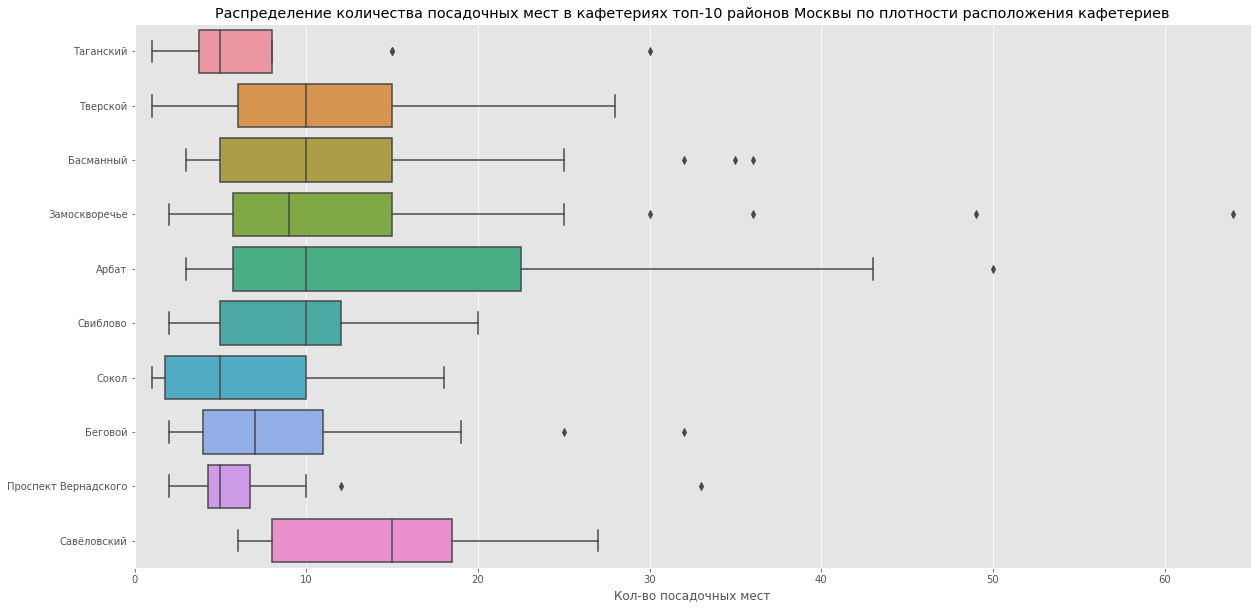

Среднее кол-во посадочных мест в кафетериях топ-10 районов Москвы по плотности расположения кафетериев:  10.764
Среднее кол-во посадочных мест в кафетериях Москвы:  10.352


In [100]:
plt.figure(figsize=(20,10))
plt.xlim(0,65)
sns.boxplot(data = cafeteria_df[cafeteria_df['District'].isin(test_3['Dist'][:10].to_list())], x = 'SeatsCount', y = 'District')
plt.title('Распределение количества посадочных мест в кафетериях топ-10 районов Москвы по плотности расположения кафетериев')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в кафетериях топ-10 районов Москвы по плотности расположения кафетериев: ',
      round(cafeteria_df[cafeteria_df['District'].isin(test_3['Dist'][:10].to_list())]['SeatsCount'].mean(), 3))
print('Среднее кол-во посадочных мест в кафетериях Москвы: ', 
      round(cafeteria_df['SeatsCount'].mean(), 3))

Из этих 10-ти районов сильно выделяются: Таганский район и Проспект Вернадского - там находятся кафетерии именно забегалочного типа, кроме 2-х выбросов; район Арбат - среднее около 10, однако большой хвост справа, то есть в районе много кафетериев с относительно большим кол-ом посадочных мест; Савеловский район - разброс небольшой, однако среднее сильно уехало вправо и составляет около 16-17 посадочных мест.

#### 4) Топ-10 районов по плотности расположения кафетериев с >= 10 посадочными местами:

Так как заказчик хочет полноценный кафетерий, а не кафетерий "быстрого обслуживания", была установлена планка в 10 посадочных мест, которая разделяет все кафетерии на 2 вышеописанные категории. Сделаем теперь топ районов с наибольшей плотностью расположения кафетериев с >= 10 посадочными местами:

In [101]:
district_df['Quan_>=10/Space'] = district_df['Quan_>=10'] / district_df['Space']
test_4 = (district_df.sort_values('Quan_>=10/Space', ascending = False))

Показатель (кол-во кафетериев с  >= 10 посадочными местами/ площадь района) у Куркино равен 0.0 (по этому показателю Куркино занимает 125 место).


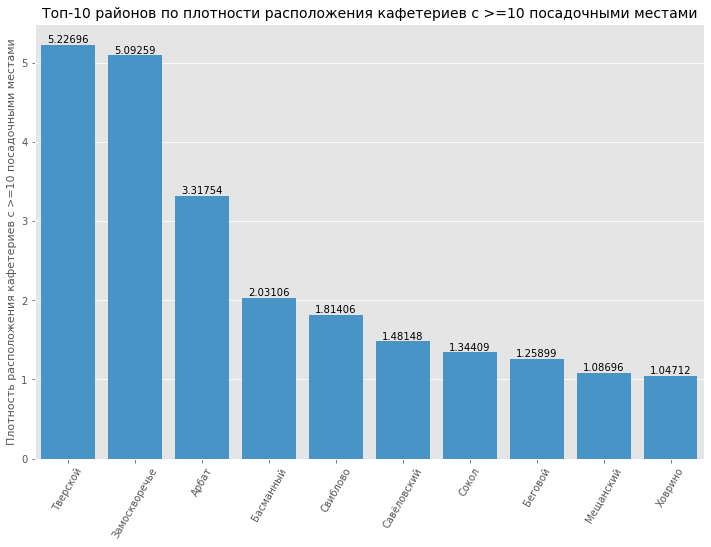

In [102]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Dist', y='Quan_>=10/Space', data=test_4[:10], color='#3498db')
plt.setp(plt.xticks()[1],rotation=60,fontsize=10);
plt.ylabel('Плотность расположения кафетериев c >=10 посадочными местами',fontsize=11)
plt.xlabel('')
plt.title('Топ-10 районов по плотности расположения кафетериев с >=10 посадочными местами',fontsize=14)
ax.bar_label(ax.containers[0])

num_4 = test_4['Dist'].to_list().index('Куркино')
print('Показатель (кол-во кафетериев с  >= 10 посадочными местами/ площадь района) у Куркино равен', 
      round(test_4['Quan_>=10/Space'].to_list()[num_4], 4), 
      '(по этому показателю Куркино занимает', num_4 + 1, 'место).')

По сравнению с предыдущим топом появились районы Ховрино и Мещанский(что довольно интересно) вместо районов Таганский и Савеловский, причем они встали прямо на их места, а в остальном порядок почти не поменялся.

Посмотрим на распределение посадочных мест в топ-10 районах Москвы по плотности расположения кафетериев c >=10 посадочными местами:

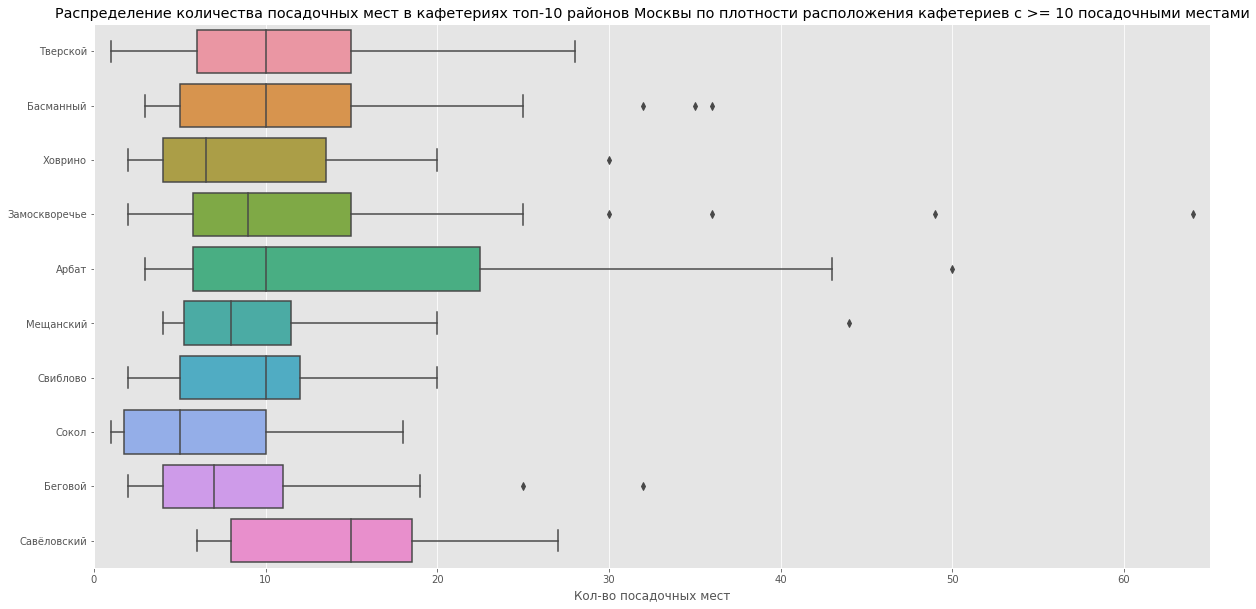

Среднее кол-во посадочных мест в кафетериях топ-10 районах Москвы по плотности расположения кафетериев с >= 10 посадочными местами: 11.576
Среднее кол-во посадочных мест в кафетериях Москвы:  10.352


In [103]:
plt.figure(figsize=(20,10))
plt.xlim(0,65)
sns.boxplot(data = cafeteria_df[cafeteria_df['District'].isin(test_4['Dist'][:10].to_list())], x = 'SeatsCount', y = 'District')
plt.title('Распределение количества посадочных мест в кафетериях топ-10 районов Москвы по плотности расположения кафетериев с >= 10 посадочными местами')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в кафетериях топ-10 районах Москвы по плотности расположения кафетериев с >= 10 посадочными местами:',
       round(cafeteria_df[cafeteria_df['District'].isin(test_4['Dist'][:10].to_list())]['SeatsCount'].mean(), 3))
print('Среднее кол-во посадочных мест в кафетериях Москвы: ', 
      round(cafeteria_df['SeatsCount'].mean(), 3))

#### 5) Топ-10 районов по соотношению жил-площадь на человека:

Будем считать данное соотношение за показатель среднего достатка населения района.

In [104]:
test_5 = (district_df.sort_values('Flat', ascending = False))

Показатель жил-площадь на человека у Куркино равен 42.2 (по этому показателю Куркино занимает 1 место).


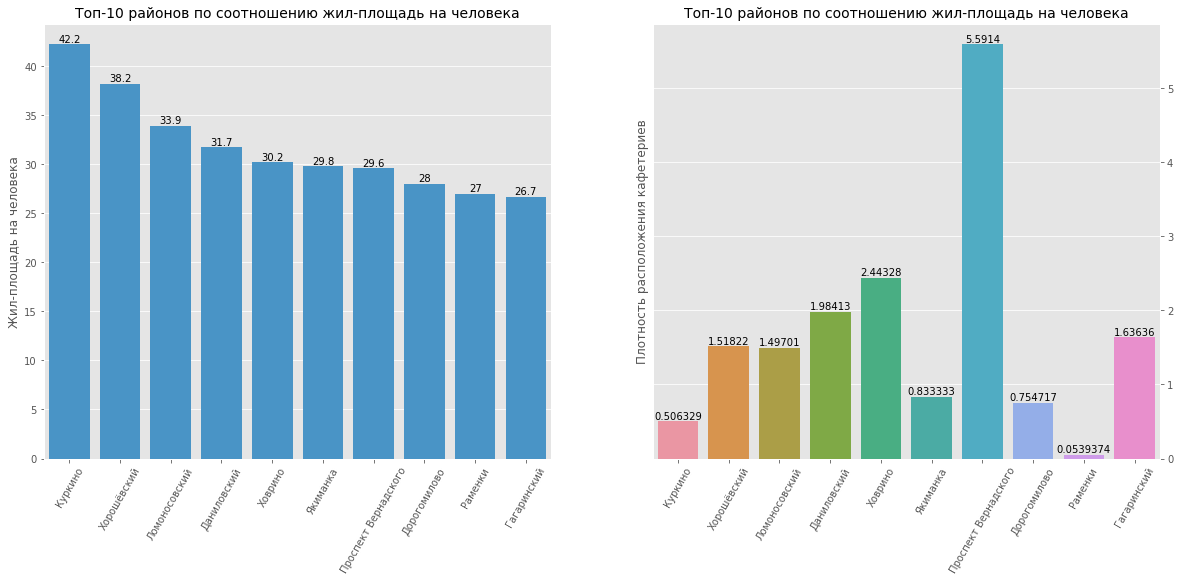

In [108]:
num_5 = test_5['Dist'].to_list().index('Куркино')
print('Показатель жил-площадь на человека у Куркино равен', 
      round(test_5['Flat'].to_list()[num_5], 4), 
      '(по этому показателю Куркино занимает', num_5 + 1, 'место).')

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 8)
)

sns.barplot(x='Dist', y='Flat', data=test_5[:10], color='#3498db', ax=ax1)
ax1.set_title('Топ-10 районов по соотношению жил-площадь на человека',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Жил-площадь на человека')
ax1.bar_label(ax1.containers[0])
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)


sns.barplot(x='Dist', y='Quan/Space', data=test_5[:10], ax=ax2)
ax2.set_title('Топ-10 районов по соотношению жил-площадь на человека',fontsize=14)
ax2.yaxis.tick_right()
ax2.set_xlabel('')
ax2.set_ylabel('Плотность расположения кафетериев')
ax2.bar_label(ax2.containers[0])
for tick in ax2.get_xticklabels():
    tick.set_rotation(60)

None

Посмотрим на распределение посадочных мест в топ-10 районах Москвы по соотношению жил-площадь на человека:

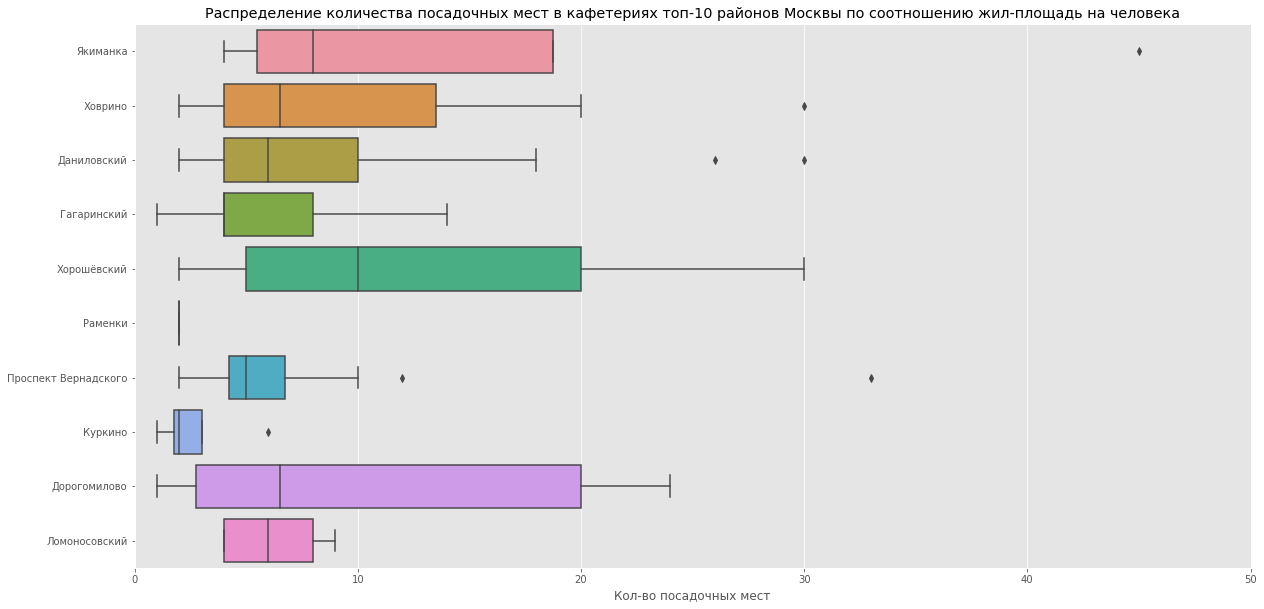

Среднее кол-во посадочных мест в кафетериях топ-10 районов Москвы по соотношению жил-площадь на человека: 8.789
Среднее кол-во посадочных мест в кафетериях Москвы:  10.352


In [73]:
plt.figure(figsize=(20,10))
plt.xlim(0,50)
sns.boxplot(data = cafeteria_df[cafeteria_df['District'].isin(test_5['Dist'][:10].to_list())], x = 'SeatsCount', y = 'District')
plt.title('Распределение количества посадочных мест в кафетериях топ-10 районов Москвы по соотношению жил-площадь на человека')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в кафетериях топ-10 районов Москвы по соотношению жил-площадь на человека:',
       round(cafeteria_df[cafeteria_df['District'].isin(test_5['Dist'][:10].to_list())]['SeatsCount'].mean(), 3))
print('Среднее кол-во посадочных мест в кафетериях Москвы: ', 
      round(cafeteria_df['SeatsCount'].mean(), 3))

Из графика видно, что:
- в Раменках вообще нет кафетериев.
- в районах Проспект Вернадского, Куркино, Ломоносовский, Гагаринский, Даниловский и Ховрино превалируют кафетерии забегалочного типа.
- районы Якиманка, Хорошевский и Дорогомилово благоприятны для открытия кафетериев с большим количеством посадочных мест.
- среднее кол-во посадочных мест в кафетериях топ-10 районов Москвы по соотношению жил-площадь на человека оказалось меньше среднего кол-ва посадочных мест по всем кафетериям Москвы.

#### 6) Топ-11 спальных районов Москвы:

Так как Куркино является типичным примером спального района Москвы с хорошим уровнем жизни, воспользуемся внешними источниками для нахождения похожих спальных районов и исследуем их. Будем пользоваться информацией, взятой с этих 2-х сайтов: https://mosberlogi.ru/science/spalnye-rajony-moskvy/?ysclid=l6azpgx20963970521, https://www.kp.ru/russia/moskva/nedvizhimost/luchshie-spalnye-rajony/?ysclid=l6azpnu1ah84545207.

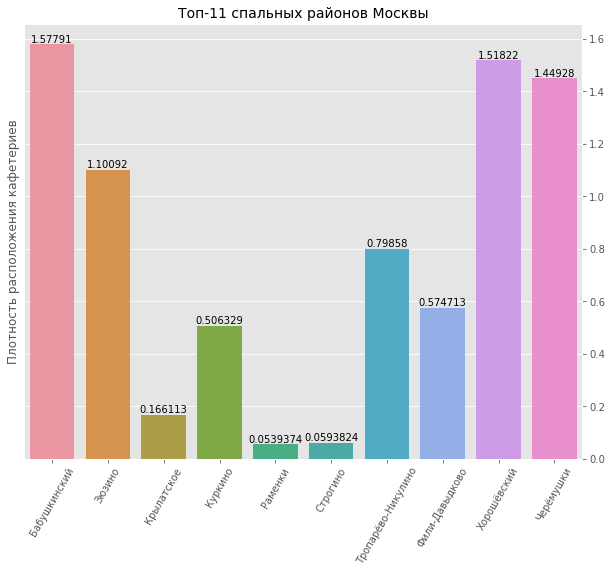

In [112]:
sleep_districts = ['Куркино', 'Строгино', 'Раменки', 'Хорошёвский', 'Бабушкинский',
                'Фили-Давыдково', 'Ясенево', 'Зюзино', 'Тропарёво-Никулино',
                'Черёмушки', 'Крылатское']
test_6 = district_df[district_df['Dist'].isin(sleep_districts)]

fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(10, 8)
)


sns.barplot(x='Dist', y='Quan/Space', data=test_6[:10], ax=ax1)
ax1.set_title('Топ-11 спальных районов Москвы',fontsize=14)
ax1.yaxis.tick_right()
ax1.set_xlabel('')
ax1.set_ylabel('Плотность расположения кафетериев')
ax1.bar_label(ax1.containers[0])
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)

None

Посмотрим на распределение посадочных мест в топ-11 спальных районах Москвы:

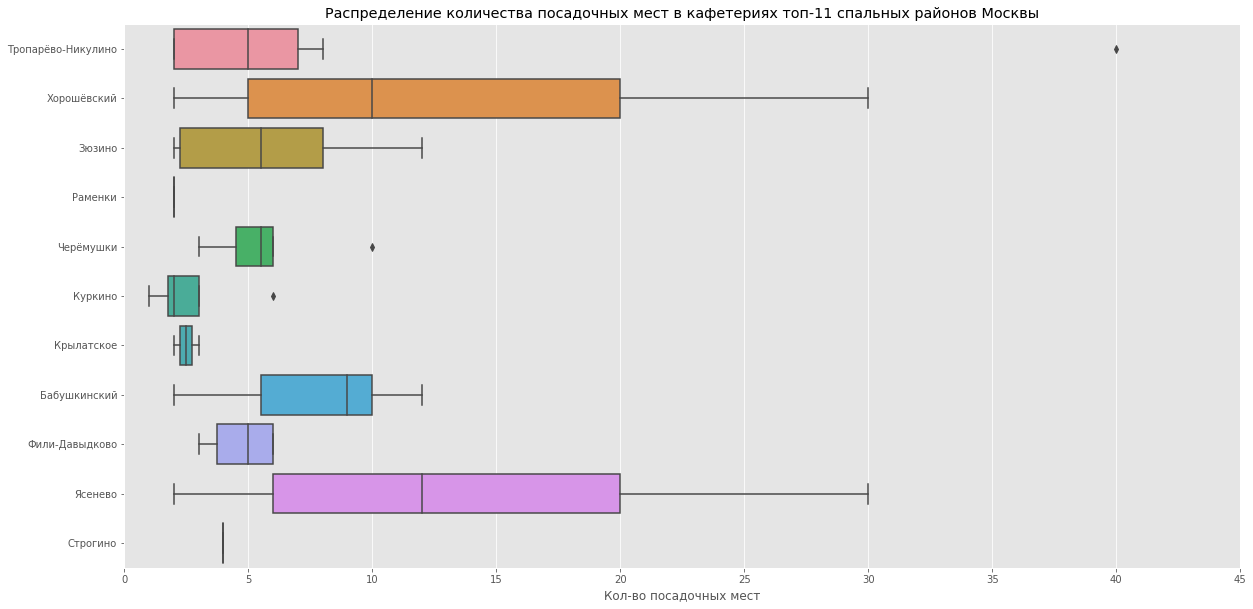

Среднее кол-во посадочных мест в кафетериях топ-11 спальных районов Москвы: 8.507
Среднее кол-во посадочных мест в кафетериях Москвы:  10.352


In [75]:
plt.figure(figsize=(20,10))
plt.xlim(0,45)
sns.boxplot(data = cafeteria_df[cafeteria_df['District'].isin(sleep_districts)], x = 'SeatsCount', y = 'District')
plt.title('Распределение количества посадочных мест в кафетериях топ-11 спальных районов Москвы')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в кафетериях топ-11 спальных районов Москвы:',
       round(cafeteria_df[cafeteria_df['District'].isin(sleep_districts)]['SeatsCount'].mean(), 3))
print('Среднее кол-во посадочных мест в кафетериях Москвы: ', 
      round(cafeteria_df['SeatsCount'].mean(), 3))

В этом топе, так же, как и в предыдущем, присутсвуют районы Куркино, Хорошевский и Раменки. Однако в Раменках вообще нет кафетериев, поэтому серьезное внимание надо обратить именно на Хорошевский район. Также из всех спальных районов сильно выделяются по распределению посадочных мест районы Ясенево и Хорошевский - в них очень большой разброс посадочных мест и большое среднее число посадочных мест.

### 7) Более глубокое выявление зависимостей

#### 1) Жил-площадь на человека и плотность расположения кафетериев

Посмотрим, как распределена жил-площадь на человека по районам Москвы:

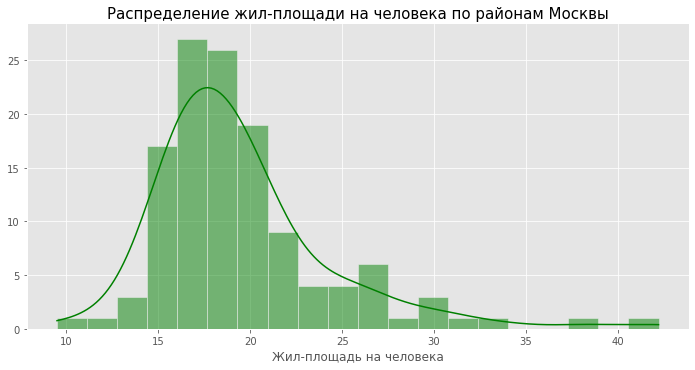

In [76]:
g = sns.displot(
    data=district_df,
    x = 'Flat',
    height = 5,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Жил-площадь на человека', '')
plt.title('Распределение жил-площади на человека по районам Москвы', fontsize=15)

None

Распределение в целом близко к нормальному, поэтому данные преобразовывать не будем.

Теперь посмотрим распределение плотности расположения кафетериев:

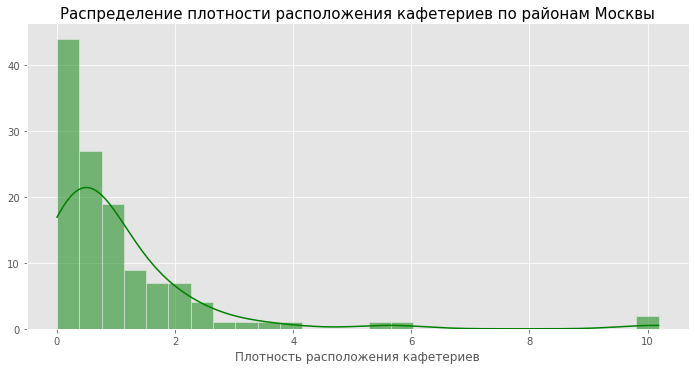

In [77]:
g = sns.displot(
    data=district_df,
    x = 'Quan/Space',
    height = 5,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Плотность расположения кафетериев', '')
plt.title('Распределение плотности расположения кафетериев по районам Москвы', fontsize=15)

None

Распределение далеко от нормального. Так как присутствует длинная лестница, то возьмем квадратный корень от величины, а затем приблизим распределение к нормальному за счет логарифмирования:

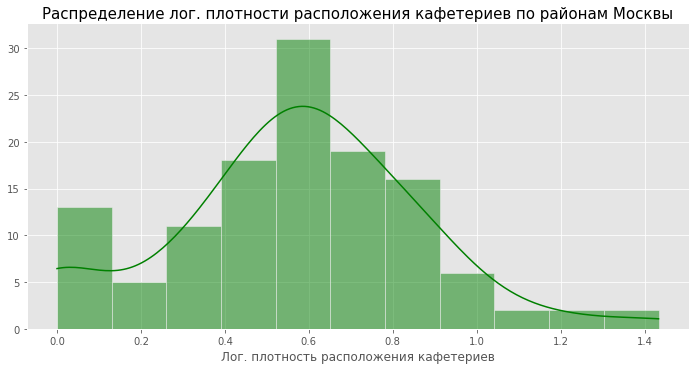

In [78]:
g = sns.displot(
    data=district_df['Quan/Space'].apply(lambda x: np.log(np.sqrt(x)+1)),
    height=5,
    aspect=2,
    color='g',
    kde=True
)
g.set_axis_labels('Лог. плотность расположения кафетериев', '')
plt.title('Распределение лог. плотности расположения кафетериев по районам Москвы', fontsize=15)

None

Видно, что получилось достаточно хорошо приблизить распределение к нормальному. Теперь посмотрим на совместное распределение этих двух величин:

Корреляция между жил-площадью на человека и лог. плотностью расположения кафетериев
равна 0.303 .


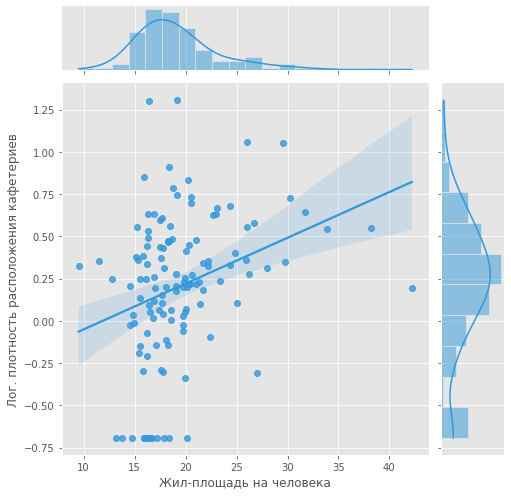

In [79]:
g = sns.jointplot(
    data = district_df,
    x = district_df['Flat'],
    y = district_df['Quan/Space'].apply(lambda x: np.log(np.sqrt(x)+0.5)),
    height=7,
    kind = 'reg',
    color = '#3498db')

g.set_axis_labels('Жил-площадь на человека', 'Лог. плотность расположения кафетериев')

print(
'Корреляция между жил-площадью на человека и лог. плотностью расположения кафетериев\nравна',
round(district_df['Flat'].corr(district_df['Quan/Space'].apply(lambda x: np.log(np.sqrt(x)+0.5))), 3),
'.')

**Вывод**: за счет преобразования(взятие квадратного корня и логарифма) плотности расположения кафетериев удалось достичь очень несильной линейной зависимости между этой величиной и жил-площадью на человека. Однако все же корреляция(~0.3) намного меньше порогового значения 0.5, поэтому зависимость нельзя считать существенной.

#### 2) Жил-площадь на человека и среднее кол-во посадочных мест 

Посмотрим, как распределено среднее кол-во посадочных мест в кафетериях районов Москвы:

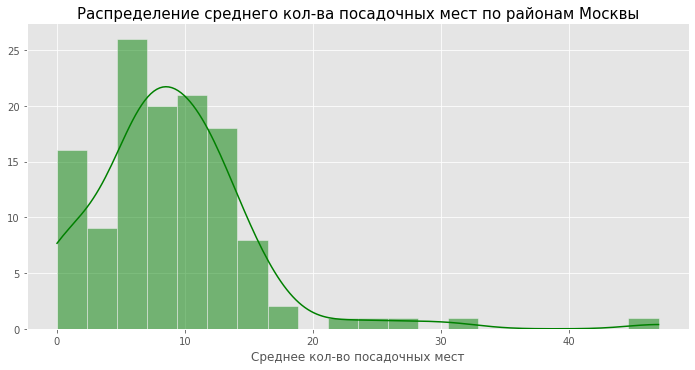

In [80]:
g = sns.displot(
    data=district_df,
    x = 'Seats_mean',
    height = 5,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Среднее кол-во посадочных мест', '')
plt.title('Распределение среднего кол-ва посадочных мест по районам Москвы', fontsize=15)

None

Распределение далеко от нормального. Попробуем сгладить его путем логарифмирования:

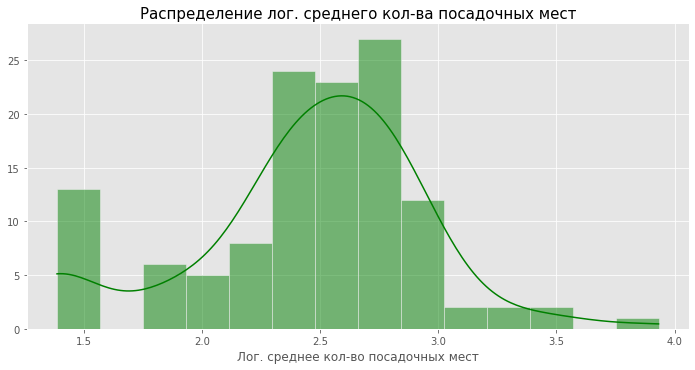

In [81]:
g = sns.displot(
    data=district_df['Seats_mean'].apply(lambda x: np.log(x+4)),
    height = 5,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Лог. среднее кол-во посадочных мест', '')
plt.title('Распределение лог. среднего кол-ва посадочных мест', fontsize=15)

None

Теперь распределение больше походит на нормальное. Посмотрим на совместное распределение среднего кол-ва посадочных мест в кафетериях района и жил-площади на человека:

Корреляция между жил-площадью на человека и лог. средним кол-ом посадочных мест в кафетериях районов Москвы равна 0.141 .


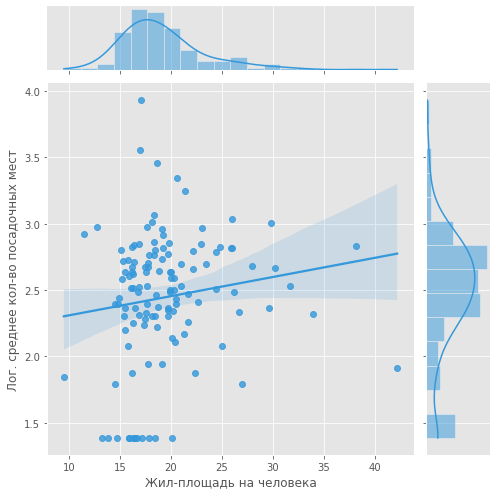

In [82]:
g = sns.jointplot(
    data = district_df,
    x = district_df['Flat'],
    y = district_df['Seats_mean'].apply(lambda x: np.log(x+4)),
    height=7,
    kind = 'reg',
    color = '#3498db')

g.set_axis_labels('Жил-площадь на человека', 'Лог. среднее кол-во посадочных мест')

print(
'Корреляция между жил-площадью на человека и лог. средним кол-ом посадочных мест в кафетериях районов Москвы равна',
round(district_df['Flat'].corr(district_df['Seats_mean'].apply(lambda x: np.log(x+4))), 3),
'.')

**Вывод**: даже после преобразования величин не удалось получить ничего вразумительного, на диаграмме данные рандомно разбросаны в одном пятне, видимо между этими величинами нет никакой зависимости.

#### 3) Среднее расстояние до ближайшей станции метро и плотность расположения кафетериев

В тепловой карте корреляции для таблицы district_df никакой линейной зависимости выявлено не было. Попробуем отлогарифмировать эти обе величины(среднее расстояние до ближайшей станции метро и плотность расположения кафетериев) и посмотрим на их совместное распределение:

Корреляция между лог. плотностью расположения кафетериев и лог. средним расстоянием
до ближайшей станции метро для кафетериев районов Москвы равна 0.856 .


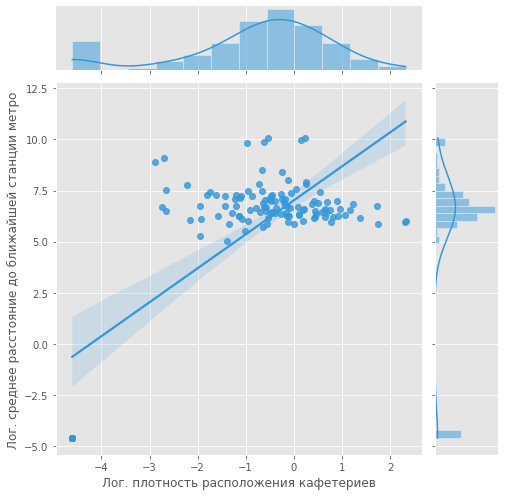

In [83]:
g = sns.jointplot(
    data = district_df,
    x = district_df['Quan/Space'].apply(lambda x: np.log(x + 0.01)),
    y = district_df['Avg_st_distance'].apply(lambda x: np.log(x + 0.01)),
    height=7,
    kind = 'reg',
    color = '#3498db')

g.set_axis_labels('Лог. плотность расположения кафетериев', 'Лог. среднее расстояние до ближайшей станции метро')

print(
'Корреляция между лог. плотностью расположения кафетериев и лог. средним расстоянием\nдо ближайшей станции метро для кафетериев районов Москвы равна',
round(district_df['Quan/Space'].apply(lambda x: np.log(x + 0.001)).corr(district_df['Avg_st_distance'].apply(lambda x: np.log(x + 0.001))), 3),
'.')

**Вывод**: путем логарифмирования обеих величин удалось получить очень большую корреляцию(~0.85), что означает, что между величинами есть хорошая положительная зависимость.

#### 4) Расстояние до ближайшей станции метро и кол-во посадочных мест

Посмотрим на распределение кол-ва посадочных мест в кафетериях Москвы:

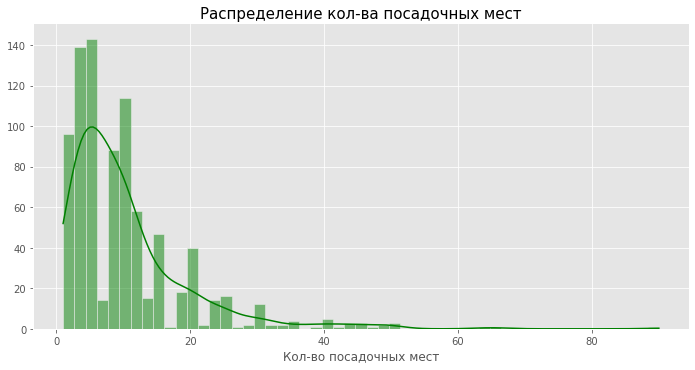

In [84]:
g = sns.displot(
    data=cafeteria_df,
    x = 'SeatsCount',
    height = 5,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Кол-во посадочных мест', '')
plt.title('Распределение кол-ва посадочных мест', fontsize=15)

None

Распределение далеко от нормального, прологарифмируем величину:

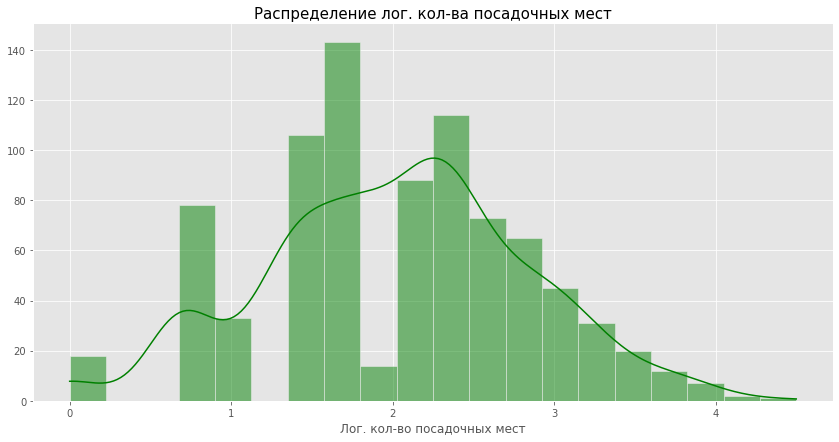

In [85]:
g = sns.displot(
    data=cafeteria_df,
    x = cafeteria_df['SeatsCount'].apply(lambda x: np.log(x)),
    height = 6,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Лог. кол-во посадочных мест', '')
plt.title('Распределение лог. кол-ва посадочных мест', fontsize=15)

None

Посмотрим на распределение расстояния до ближайшей станции метро для кафетериев Москвы:

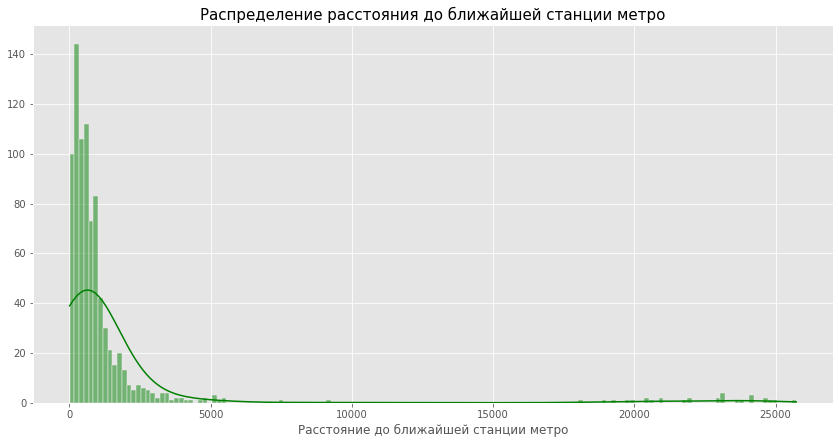

In [86]:
g = sns.displot(
    data=cafeteria_df,
    x = 'Station_distance',
    height = 6,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Расстояние до ближайшей станции метро', '')
plt.title('Распределение расстояния до ближайшей станции метро', fontsize=15)

None

Распределение далеко от нормального, прологарифмируем величину:

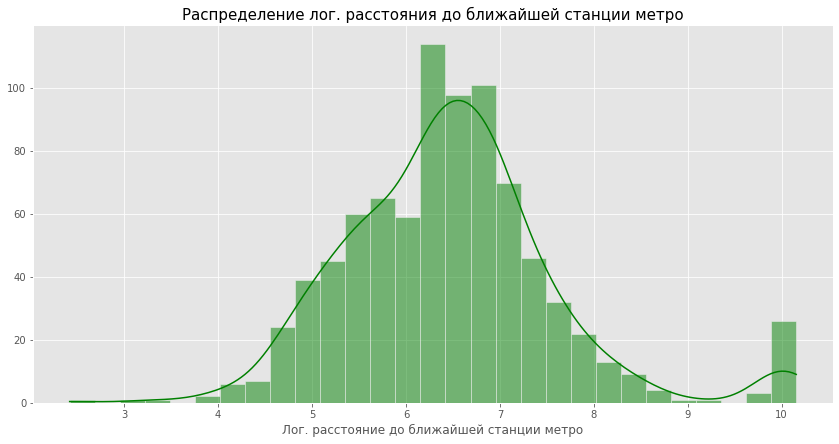

In [87]:
g = sns.displot(
    data=cafeteria_df,
    x = cafeteria_df['Station_distance'].apply(lambda x: np.log(x)),
    height = 6,
    aspect=2,
    color = 'g',
    kde = True
)
g.set_axis_labels('Лог. расстояние до ближайшей станции метро', '')
plt.title('Распределение лог. расстояния до ближайшей станции метро', fontsize=15)

None

Посмотрим на совместное распределение этих 2-х величин:

Корреляция между лог. кол-ом посадочных мест и лог. расстоянием до ближайшей станции равно 0.052 .


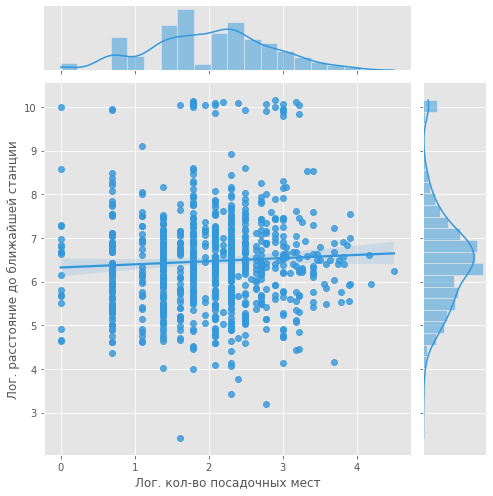

In [88]:
g = sns.jointplot(
    data = cafeteria_df,
    x = cafeteria_df['SeatsCount'].apply(lambda x: np.log(x)),
    y = cafeteria_df['Station_distance'].apply(lambda x: np.log(x)),
    height=7,
    kind = 'reg',
    color = '#3498db')

g.set_axis_labels('Лог. кол-во посадочных мест', 'Лог. расстояние до ближайшей станции')

print(
'Корреляция между лог. кол-ом посадочных мест и лог. расстоянием до ближайшей станции равно',
round(cafeteria_df['SeatsCount'].apply(lambda x: np.log(x)).corr(cafeteria_df['Station_distance'].apply(lambda x: np.log(x))), 3),
    '.')

**Вывод**: к сожалению, даже после преобразований линейная зависимость выявлена не была. Также на диаграмме видно, что данные распределены равномерно по вертикалям, то есть зависимость не может быть описана никакими аналитическими функциями.

### 8) Работа с кафетериями и расстоянием до ближайшей станции метро

Результат, полученный при анализе зависимости плотности расположения кафетериев и средним расстоянием до ближайшей станции метро для районов Москвы(была получена корреляция для лог. величин около 0.85) навеял мысль о проведении более тщательного анализа и расположения кафетериев Москвы относительно станций метрополитена.

Так как в Куркино не проведено метро, это может оказаться проблемой для открытия кафетериев в этом районе. В связи с этим надо узнать расстояние от района Куркино до ближайшей станции метро. После запроса в Интернете была получена следующая информация: ближайшая станция метро - Планерная, и расстояние от нее до центра МФЦ Куркино составляет 5.6 км(МФЦ находится на краю Куркино, ближе к МКАДу, поэтому фактическое расстояние от потенциальных точек для открытия кафетериев будет еще больше).

Построим диаграммы, которые будут показывать, сколько кафетериев есть в различных интервалах от ближайшей станции метро:

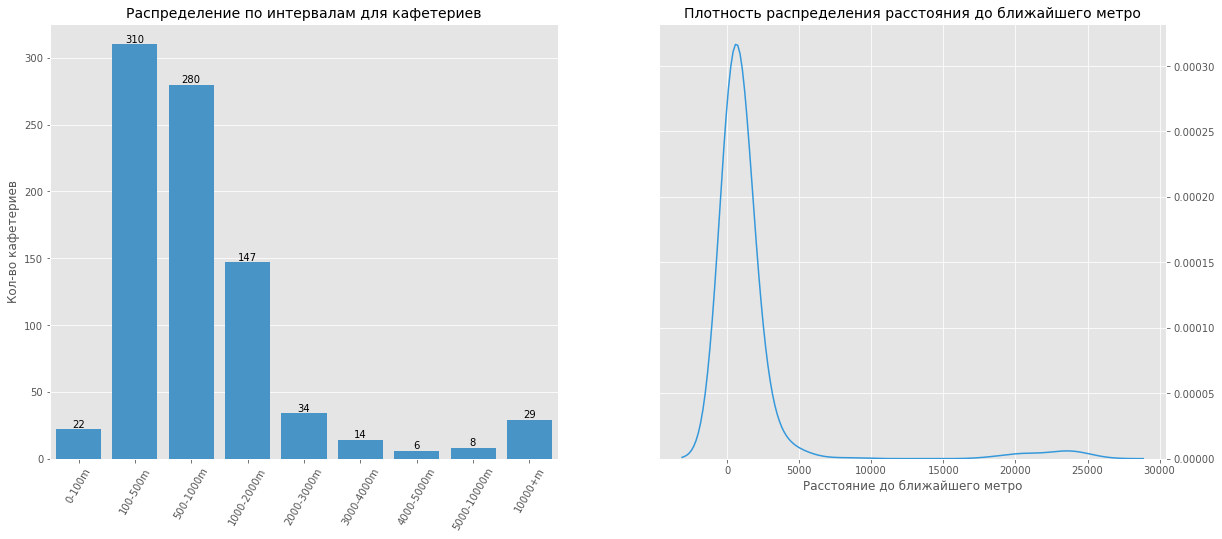

In [92]:
# распределение для кафетериев
data_1 = [['0-100m', (cafeteria_df['Station_distance'].between(0,100)).sum()],
     ['100-500m', (cafeteria_df['Station_distance'].between(100,500)).sum()],
     ['500-1000m', (cafeteria_df['Station_distance'].between(500,1000)).sum()],
     ['1000-2000m', (cafeteria_df['Station_distance'].between(1000,2000)).sum()],
     ['2000-3000m', (cafeteria_df['Station_distance'].between(2000,3000)).sum()],
     ['3000-4000m', (cafeteria_df['Station_distance'].between(3000,4000)).sum()],
     ['4000-5000m', (cafeteria_df['Station_distance'].between(4000,5000)).sum()],
     ['5000-10000m', (cafeteria_df['Station_distance'].between(5000,10000)).sum()],
     ['10000+m', (cafeteria_df['Station_distance']>10000).sum()]]
df_1 = pd.DataFrame(data_1)
df_1.columns=['interval', 'quantity']

# распределение для открытых с апреля 2021 года кафетериев
data_2 = [['0-100m', (opened_cafeteria_df['Station_distance'].between(0,100)).sum()],
     ['100-500m', (opened_cafeteria_df['Station_distance'].between(100,500)).sum()],
     ['500-1000m', (opened_cafeteria_df['Station_distance'].between(500,1000)).sum()],
     ['1000-2000m', (opened_cafeteria_df['Station_distance'].between(1000,2000)).sum()],
     ['2000-3000m', (opened_cafeteria_df['Station_distance'].between(2000,3000)).sum()],
     ['3000-4000m', (opened_cafeteria_df['Station_distance'].between(3000,4000)).sum()],
     ['4000-5000m', (opened_cafeteria_df['Station_distance'].between(4000,5000)).sum()],
     ['5000-10000m', (cafeteria_df['Station_distance'].between(5000,10000)).sum()],
     ['10000+m', (opened_cafeteria_df['Station_distance']>10000).sum()]]
df_2 = pd.DataFrame(data_2)
df_2.columns=['interval', 'quantity']


fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 8)
)

sns.barplot(data=df_1, x='interval', y='quantity', color='#3498db', ax=ax1)
ax1.set_title('Распределение по интервалам для кафетериев',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Кол-во кафетериев')
ax1.bar_label(ax1.containers[0])
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)


sns.kdeplot(data=cafeteria_df, x='Station_distance', color='#3498db', ax=ax2)
ax2.set_title('Плотность распределения расстояния до ближайшего метро',fontsize=14)
ax2.yaxis.tick_right()
ax2.set_xlabel('Расстояние до ближайшего метро')
ax2.set_ylabel('')

None

**Вывод**: из графиков видно, что подавляющее большинство кафетериев открыто в интервале 100-2000 метров до станции метро. Совсем рядом с метро открыто довольно мало кафетериев(22), да и дальше 2 км открыто довольно мало кафетериев(всего около сотни на довольно большой интервал). Это может оказаться весомой проблемой для открытия кафетерия в районе Куркино.

## 3. Результаты 

Итак, был проведен анализ рынка кафетериев Москвы за 2022 год, и были получены важные результаты:

* Количество посадочных мест в кафетериях Москвы варьируется от 1 до 24(в основном от 4 до 12). Если требуется больше посадочных мест, то надо расширять меню(добавлять обычное меню с горячими блюдами, чтобы кафетерией был ближе по парадигме к кафе, где распределение посадочных мест смещено вправо относительно посадочных мест в кафетериях).
<br><img src='pics/2.png' width='600'>


* В Москве не сильно распространены сетевые кафетерии(12.2 % от общего числа). Под потенциальную франшизу для заказчика(заведения среднего ценового сегмента; не забегалочного типа, то есть от 10 посадочных мест; подходящее меню, состоящее из свежей выпечки, холодных напитков, кофе и чая; интерьер, присущий кафетериям в итальянском стиле; доступна франшиза) подходят кафетерии компаний **Буханка** и **SeDelice**.


* Если говорить про распределение кафетериев по округам Москвы, то среди них сильно выделяется Центральный Административный Округ(где находятся районы с большой проходимостью и огромным туристическим потенциалом) - в нем расположено больше 400 кафетериев(практически половина от общего числа). Второе место занимает Северный Административный Округ с более чем 100 кафетериями.


* Из анализа плотности расположения кафетериев в Москве стало ясно: у Куркино этот показатель равен ~0.5(72 место), для сравнения, в топ-10 районах по этому показателю он варьируется от 10 до 2.5, то есть на порядок выше чем у Куркино. 9 районов из топ-10 по данному показателю находятся рядом с центром, что еще раз подтверждает теорию, что для рентабельности кафетерия очень важен именно туристический поток и проходимость в месте открытия. Из графика распределения посадочных мест для этих топ-10 районов видно, что в целом они не сильно отличаются от кафетериев Москвы в целом(выделяются Таганский, Сокол и Проспект Вернадского со смещенным влево ящиком с усами, и Савеловский с сильно смещенным вправо ящиком). Таким образом, описанное в этом пункте является одним из основных минусов для открытия кафетерия в Куркино.
<br><img src='pics/3.png' width='600'>


* C апреля 2021 года было было открыто 467 кафетериев в Москве, а закрыто 559 кафетериев. Итого, в Москве с апреля 2021 года стало на 92 кафетерия меньше. То есть даже после ковидных ограничений рынок кафетериев находится в сильном упадке, и это надо иметь в виду при планировании и прогнозировании доходов при открытии кафетерия.


* К сожалению, из тепловой карты корреляции не удалось выделить никаких адекватных линейных зависимостей, кроме корреляции между количеством кафетериев в районе и количеством открытых с апреля 2021 года кафетериев, то есть при открытии кафетерия нужно смотреть на количество уже существующих в районе кафетериев, а если в районе нет спроса на кафетерии, то при открытии своего будет сложно получить на него сильный спрос. Это еще один большой аргумент против открытия кафетерия в Куркино.


* В топ-10 районах по плотности расположения кафетериев с >=10 посадочными местами находятся в целом те же районы, что и в обычном топе по плотности расположения кафетериев. Однако стоит выделить 10 место - район Ховрино. Ховрино находится далеко от центра и достаточно близко к Куркино. В Куркино же в принципе нет кафетериев с >=10 посадочными местами.
<br><img src='pics/4.png' width='600'>

* Из анализа топа по жил-площади на человека и топа сплаьных районов Москвы я бы выделил 2 вещи: показатель достатка жителей района(жил-площадь на человека) никак не влияет на рентабельность кафетериев в этом районе, в спальных районах тоже хорошо открываются кафетерии(это конечно не сравнить с ситуацией в центре Москвы, однако маленький туристический поток не означает плохую рентабельность кафетерия). Также хочется провести параллель: в обоих топах на ведущих местах присутствуют районы Куркино и Хорошевский. В Куркино рынок кафетериев очень мало развит, однако в Хорошевском районе ситуация сильно лучше. Возможно, из-за схожести районов можно утверждать, что в Куркино тоже со временем будет расти рынок кафетериев. Однако у районов есть одно сильное отличие: в Хорошевский район проведено метро, и он находится сильно ближе к центру.
<br><img src='pics/5.png' width='600'>
<img src='pics/6.png' width='300'>


* Попытки выявить нелинейную зависимость между плотностью расположения кафетериев и жил-площадью на человека ничем не увенчались. Однако и сказать, являются ли величины независимыми, с уверенностью нельзя.


* После некоторых преобразований величин и рассмотрения совместного распределения стало ясно: среднее кол-во посадочных мест и жил-площадь на человека - независимые величины(данные на графике совместного распределения  равномерно разбросаны в центральном круговом облаке).
<br><img src='pics/7.png' width='400'>


* После логарифмирования плотности расположения кафетериев и среднего расстояния до ближайшей станции метро была получена очень большая зависимость - корреляция около 0.9. Это еще раз подтверждает, что для рентабельности кафетерия очень важна проходимость.
<br><img src='pics/8.png' width='400'>


* После некоторых преобразований величин и рассмотрения совместного распределения стало ясно: расстояние до ближайшей станции и количество посадочных мест - независимые величины(данные на графике совместного распределения равномерно размазаны по вертикальным линиям).
<br><img src='pics/9.png' width='400'>


* Анализ распределения кафетериев относительно станций метрополитена показал: совсем рядом со станциями(0-100 метров) открыто очень мало кафетериев; в основном кафетерии открывают в промежутке от 100 метров до 1 км(больше половины от общего числа); также достаточно кафетериев(больше 100) открыто в диапазоне 1-2км, то есть данный диапазон в целом тоже благоприятен для открытия кафетерия; после 5км открыто крайне малое количество кафетериев, этот диапазон можно считать малоприятным для открытия кафетерия. А учитывая то, что ближайшая точка района Куркино находится за рубежом в 5 км до метро Планерная(ближайшая станция), это становится еще одним аргументом против открытия кафетерия в Куркино.
<br><img src='pics/10.png' width='600'>

## 4. Рекомендации 

В качестве потенциальной локации для открытия кафетерия после проведенного анализа нельзя рекомендовать район Куркино, так как очень много факторов против этого: на данный момент в Куркино очень мало кафетериев, до ближайшей станции метро большге 5 километров, очень маленькая проходимость в районе. Однако и полностью отвергать эту локацию нельзя: у Хорошевского района похожие входные данные и большая плотность кафетериев в районе(отличие лишь в расстоянии до центра Москвы и наличии станции метрополитена).

Вместо района Куркино можно порекомендовать следующие локации:
1. Район Ховрино: недалеко от района Куркино, входит в топ-10 районов по плотности расположения кафетериев с >=10 посадочными местами.
2. Локации в Химках(Долгопрудном) в диапазоне 100-1000 метров от ж/д станции, ведь как показал анализ, благосостояние района никак не влияет на количество посадочных мест в кафетериях и на рентабельность кафетериев в районе.
3. Локации в топ-10 районах по плотности расположения кафетериев в диапазоне 100-1000 метров от станции метро. Там будет гарантирована большая проходимость, вследствие чего и большая рентабельность заведения.

Я бы посоветовал заказчику открывать индивидуальное заведение, а если он хочет кафетерий по франшизе, то я рекомендовал бы выбрать из 2-х: **Буханка** и **SeDelice**.

Как было выяснено, ни расстояние до ближайшей станции метро, ни жил-площадь на человека никак не влияют на количество посадочных мест в кафетерии, поэтому вне зависимости от локации я рекомендовал бы открывать заведение с количеством посадочных мест в районе $12\pm4$. Если заказчик хочет больше посадочных мест, то я бы посоветовал при этом в меню добавить горячие блюда и, возможно, алкогольные напитки.